# Data Preparation

### Import packages

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

### Import utilities

In [2]:
import sys
sys.path.append('../src/')
import utils

disease_cat_map  = utils.disease_rename_map 

### Import data

Database connection

In [3]:
conn = sqlite3.connect("../data/db/gfm.db")

Primary data data

In [4]:
master = pd.read_sql_query("SELECT * FROM master", conn)

In [5]:
er = pd.read_sql_query("SELECT * FROM er_final", conn)

In [6]:
disease_pivot = pd.read_sql_query("SELECT * FROM pivot", conn)

In [7]:
#int_pivot = pd.read_sql_query("SELECT * FROM int_pivot", conn)

In [8]:
#primary_cat = pd.read_sql_query("SELECT * FROM primary_cat", conn)

In [9]:
primary_cat = pd.read_sql_query("SELECT * FROM primary_disease",conn)

In [10]:
#shares = pd.read_csv("../data/social_media_shares/social_media_shares.csv")

Additional geographic data

In [11]:
state_pop = pd.read_csv('../data/census/state_pop.csv')

In [12]:
census_regions = pd.read_csv('../data/census/census_regions.csv')

Donation data

In [13]:
#d = pd.read_sql_query("SELECT * FROM donation_tb", conn)

OOP cost data

In [14]:
oop = pd.read_excel('../data/jama_oop_data.xlsx', sheet_name = 'GBD OOP')
gbd_map = pd.read_excel('../data/jama_oop_data.xlsx', sheet_name = 'GBD to CF map')

### Clean data

Primary disease category

In [15]:
# del primary_cat['index']
# primary_cat.columns = ['url','primary_disease_cat','primary_int_cat']

In [16]:
del primary_cat['index']

In [17]:
primary_cat.columns = ['url','primary_disease_cat']

In [18]:
primary_disease_dummy = pd.get_dummies(primary_cat['primary_disease_cat'])
cols = primary_disease_dummy.columns.str.lower().str.replace(' ','_').str.replace(',','')
cols = ['pd_' + x for x in cols]
primary_disease_dummy.columns = cols
primary_disease_dummy['url'] = primary_cat['url']

Primary intermediate category (aka condition)

In [19]:
# primary_cond_dummy = pd.get_dummies(primary_cat['primary_int_cat'])
# cols = primary_cond_dummy.columns.str.lower().str.replace(' ','_').str.replace(',','')
# cols = ['pc_' + x for x in cols]
# primary_cond_dummy.columns = cols
# primary_cond_dummy['url'] = primary_cat['url']

Disease category, not mutually exclusive

In [20]:
del disease_pivot['index']
del disease_pivot['level_0']
cols = disease_pivot.columns
cols = ['d_' + x for x in cols]
cols[0] = 'url'
disease_pivot.columns = cols

In [21]:
disease_pivot['d_cardiovascular_diseases'] = disease_pivot['d_cardiovascular_diseases']
disease_pivot['d_endocrine_diseases'] = disease_pivot['d_endocrine_diseases']
disease_pivot['d_gastrointestinal_diseases'] = disease_pivot['d_gastrointestinal_diseases']
disease_pivot['d_genitourinary_diseases'] = disease_pivot['d_genitourinary_diseases']
disease_pivot['d_infections'] = disease_pivot['d_infections']
disease_pivot['d_injuries_and_external_causes'] = disease_pivot['d_injuries_and_external_causes']
disease_pivot['d_mental_and_substance_use_disorders'] = disease_pivot['d_mental_and_substance_use_disorders']
disease_pivot['d_musculoskeletal_diseases'] = disease_pivot['d_musculoskeletal_diseases']
disease_pivot['d_neoplasms'] = disease_pivot['d_neoplasms']
disease_pivot['d_nervous_system_diseases'] = disease_pivot['d_nervous_system_diseases']
disease_pivot['d_respiratory_diseases'] = disease_pivot['d_respiratory_diseases']

Condition, not mutually exclusive

In [22]:
# cols = int_pivot.columns
# cols = ['c_' + x for x in cols]
# cols[0] = 'url'
# int_pivot.columns = cols

Add financial variables

In [23]:
master.loc[:,'per_raised'] = (master['current_amount']/master['goal_amount']).round(2) * 100
master.loc[:,'hit_goal'] = [1 if x >= 100 else 0 for x in master['per_raised']]

Recode NDI quantile as categorical

In [24]:
master['ndi_quantile'] = master['ndi_quantile'].astype('category')

### Merge data

In [25]:
master = master.merge(primary_cat, on='url', how='left')

In [26]:
master = master.merge(primary_disease_dummy, on='url', how='left')

In [27]:
# master = master.merge(primary_cond_dummy, on='url', how='left')

In [28]:
master = master.merge(disease_pivot, on='url', how='left')
master.loc[:,list(disease_pivot.columns[1:])] = master.loc[:,list(disease_pivot.columns[1:])].fillna(0)

In [29]:
# master = master.merge(int_pivot, on='url', how='left')
# master.loc[:,list(int_pivot.columns[1:])] = master.loc[:,list(int_pivot.columns[1:])].fillna(0)

In [30]:
master['primary_disease_cat'] = master['primary_disease_cat'].fillna('No disease')

In [32]:
[x for x in master.columns]

['index',
 'url',
 'donation_count',
 'donor_reached_max',
 'currencycode',
 'current_amount',
 'goal_amount',
 'fund_name',
 'created_at',
 'social_share_last_update',
 'city',
 'country',
 'postal_code',
 'is_team',
 'year',
 'month',
 'zip_len',
 'zip',
 'state_county_fips',
 'tot_ratio',
 'county_name',
 'ndi_quantile',
 'standardized_ndi',
 'total_population',
 'percent_female',
 'unemployment_rate',
 'median_income',
 'percent_poverty',
 'no_health_insurance',
 'public_health_insurance',
 'private_health_insurance',
 'home_owners',
 'percent_1_1.5_per_room',
 'more_1.5_per_room',
 'renter_occupied',
 'no_car',
 'single_mom',
 'single_dad',
 'home_median_value',
 'ed_percent_highschool',
 'ed_percent_bachelors',
 'has_internet',
 'percent_less_10k',
 'percent_10k_15k',
 'percent_15k_25k',
 'percent_25k_35k',
 'percent_white',
 'percent_under_5',
 'percent_5_to_9',
 'percent_10_to_14',
 'percent_15_to_19',
 'percent_20_to_24',
 'percent_25_to_34',
 'percent_35_to_44',
 'percent_45_

In [33]:
er.head()

,index,url,chunks,begin,end,sent,entity_code,results,resolutions,res_distances,icd_10_cm_code,ccsr_category,disease_category,icd_10_cm_code_desc,int_category
0,0,https://www.gofundme.com/f/sandi-rustad,Metaplastic breast cancer,33.0,57.0,0.0,C5091,C5091:::C5092:::C509:::C5061:::C4352:::C5041::...,metaplastic carcinoma of breast:::metaplastic ...,5.5764:::6.6196:::7.2053:::7.4696:::7.4981:::7...,C5091,Breast cancer - all other types,Neoplasms,best_match,None
1,1,https://www.gofundme.com/f/jacob-salkowiczs-ca...,Level 3-E Lymphoma,77.0,94.0,0.0,C821,C821:::C8590:::C8238:::C823:::C8228:::C8223:::...,follicular lymphoma grade 3:::lymphoma stage i...,7.2421:::7.8604:::8.7344:::8.7765:::9.0709:::9...,C821,Non-Hodgkin lymphoma,Neoplasms,best_match,None
2,2,https://www.gofundme.com/f/Momsfight,ovarian cancer,811.0,824.0,12.0,C56,C56:::D4959:::C569:::Z0389:::Z8041:::C7960:::C...,ovarian cancer:::ovarian tumor:::cancer of ova...,0.0000:::6.0994:::6.1195:::6.3743:::6.4700:::7...,C56,Female reproductive system cancers - ovary,Neoplasms,best_match,None
3,3,https://www.gofundme.com/f/Momsfight,falls,1581.0,1585.0,24.0,T5090,T5090:::R296:::W19XX:::V809:::R090:::W109X:::W...,falls:::falls (finding):::fall:::fall down sta...,0.0000:::6.0052:::6.0167:::7.4259:::7.4977:::7...,T5090,Poisoning/toxic effect/adverse effects/underdo...,Injuries and external causes,best_match,None
4,5,https://www.gofundme.com/f/9cjgq9-help-a-fello...,mercury poisoning,60.0,76.0,0.0,T561X,T561X:::T561:::T490X:::X49:::T5691,mercury poisoning:::organic mercury poisoning:...,0.0000:::5.3321:::5.7321:::6.6486:::8.3097,T561X,"Toxic effects, subsequent encounter",Injuries and external causes,best_match,None


# Figure X
Relative frequency of any disease category

In [31]:
#rename mental health disorders
master['primary_disease_cat'].replace({'Mental and substance use disorders':'Mental health disorders'}, inplace=True)

In [32]:
master['no_disease_count'] = [0 for x in master['url']]

In [33]:
master.loc[master['primary_disease_cat'] == 'No disease','no_disease_count'] = 1

In [34]:
disease_pivot_sub = disease_pivot[disease_pivot['url'].isin(master['url'].tolist())]

In [35]:
# l = sorted(master[~master['primary_disease_cat'].isna()]['primary_disease_cat'].unique().tolist())
# l.insert(0, 'url')
# disease_pivot_sub.columns = l

In [36]:
#Rename categories
disease_pivot_sub.rename(columns=disease_cat_map, inplace=True)

In [37]:
#Add to master data
disease_pivot_sub = disease_pivot_sub.merge(master[['url','no_disease_count']], on='url', how='left')

In [38]:
disease_pivot_sub.rename(columns={'no_disease_count':'No disease'}, inplace=True)

In [39]:
disease_cat_melt = disease_pivot_sub[disease_pivot_sub.columns[1:]].melt()
disease_cat_melt = disease_cat_melt[disease_cat_melt['value'] > 0]
#disease_cat_melt['variable'].replace(disease_rename_map, inplace=True)

In [40]:
pd.concat([disease_cat_melt['variable'].value_counts(),disease_cat_melt['variable'].value_counts()/87449], axis=1)

,variable,variable
Neoplasms,37832,0.432618
Injuries and external causes,17841,0.204016
No disease,14589,0.166829
Cardiovascular diseases,11773,0.134627
Infections,8597,0.098309
Nervous system diseases,7593,0.086828
Musculoskeletal diseases,5500,0.062894
Respiratory diseases,4791,0.054786
Gastrointestinal diseases,4685,0.053574
Mental health disorders,4672,0.053425


In [41]:
d = (disease_cat_melt['variable'].value_counts()/87449) * 100

In [42]:
d = d.reset_index()

In [43]:
d.columns = ['cat','per']

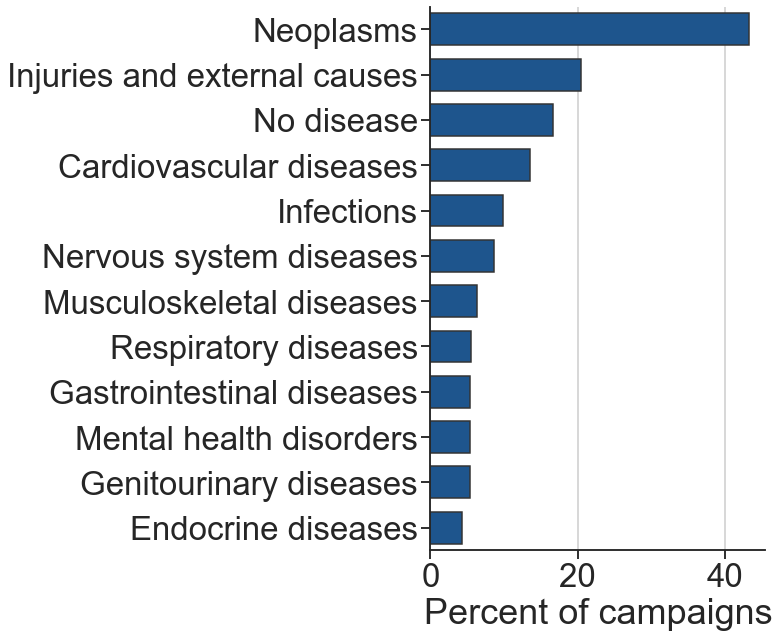

In [48]:
order = [
    'Neoplasms',
    'Injuries and external causes',
    'No disease',
    'Cardiovascular diseases',
    'Infections',
    'Nervous system diseases',
    'Musculoskeletal diseases',
    'Respiratory diseases',
    'Gastrointestinal diseases',
    'Mental health disorders',
    'Genitourinary diseases',
    'Endocrine diseases'
]

sns.set(style="ticks")
sns.set_context('talk', font_scale=2)

plt.figure(figsize=(6, 10))
ax = sns.barplot(y='cat', x='per', data=d, color=sns.color_palette('Blues')[5], edgecolor=".2", order=order)
ax.set_xlabel('Percent of campaigns')
ax.set_title('')
ax.xaxis.grid(True)
ax.set_axisbelow(True)
ax.set_ylabel('')


widthbars = [0.7 for x in range(0,12)]
for bar, newwidth in zip(ax.patches, widthbars):
    y = bar.get_y()
    height = bar.get_height()
    centre = y + height/2.
    bar.set_y(centre - newwidth/2.)
    bar.set_height(newwidth)

#plt.tight_layout(pad=3)
sns.despine()
#plt.savefig("../plots/00-FIGURE_1.eps", bbox_inches='tight')
plt.savefig("../plots/POSTER-FIGURE_1.eps", bbox_inches='tight')

# Figure 2

In [49]:
oop = pd.read_excel('../data/jama_oop_data.xlsx', sheet_name = 'GBD OOP')
gbd_map = pd.read_excel('../data/jama_oop_data.xlsx', sheet_name = 'GBD to CF map')

In [50]:
oop.columns = ['cond','total','oop_per']

In [51]:
#check that conditions align between datasets
set(gbd_map['Condition Level three'])^set(oop['cond'])

set()

OOP

In [52]:
oop['oop_spend'] = (oop['total'] * oop['oop_per'])/100

In [53]:
oop_gbd = oop.merge(gbd_map, left_on='cond', right_on='Condition Level three')
oop_gbd.shape

(154, 9)

In [54]:
oop_gbd = oop_gbd[oop_gbd['CF Disease category'] != 'Exclude']
oop_gbd = oop_gbd[~oop_gbd['CF Disease category'].isnull()]

In [55]:
oop_by_cat = oop_gbd[['CF Disease category','oop_spend']].groupby('CF Disease category').agg('sum')
oop_by_cat.reset_index(inplace=True)

In [56]:
oop_by_cat['oop_spend_per'] = (oop_by_cat['oop_spend']/oop_by_cat['oop_spend'].sum())*100

In [57]:
oop_by_cat['type'] = ['Out-of-pocket spending' for x in oop_by_cat['oop_spend']]
del oop_by_cat['oop_spend']
oop_by_cat.rename(columns={'oop_spend_per':'spend', 'CF Disease category':'cat'}, inplace=True)

OOP - Ada

In [58]:
ada = pd.read_excel('../data/jama_oop_data_ada.xlsx', sheet_name = 'Sheet4')

In [59]:
ada['2016 $Billion'] = [x.split('(')[0].split('$')[1] for x in ada['2016 $Billion']]
ada['2016 $Billion'] = ada['2016 $Billion'].astype(float)

In [60]:
ada['Out-of-pocket'] = [x.split('%')[0] for x in ada['Out-of-pocket']]
ada['Out-of-pocket'] = ada['Out-of-pocket'].astype(float)

In [61]:
del ada['Rank']
ada.rename(columns={'Condition':'cond','2016 $Billion':'total','Out-of-pocket':'oop_per'}, inplace=True)
ada['oop_spend'] = (ada['total'] * ada['oop_per'])/100

In [62]:
ada['cond'].replace('\n',' ',inplace=True, regex=True)

In [63]:
set(gbd_map['Condition Level three'])^set(ada['cond'])

set()

In [64]:
oop_gbd = ada.merge(gbd_map, left_on='cond', right_on='Condition Level three')
oop_gbd.shape

(154, 9)

In [65]:
oop_gbd = oop_gbd[oop_gbd['CF Disease category'] != 'Exclude']
oop_gbd = oop_gbd[~oop_gbd['CF Disease category'].isnull()]

In [66]:
oop_by_cat = oop_gbd[['CF Disease category','oop_spend']].groupby('CF Disease category').agg('sum')
oop_by_cat.reset_index(inplace=True)

In [67]:
oop_by_cat['oop_spend_per'] = (oop_by_cat['oop_spend']/oop_by_cat['oop_spend'].sum())*100

In [68]:
oop_by_cat['type'] = ['Out-of-pocket spending' for x in oop_by_cat['oop_spend']]
del oop_by_cat['oop_spend']
oop_by_cat.rename(columns={'oop_spend_per':'spend', 'CF Disease category':'cat'}, inplace=True)

Crowdfunding

In [69]:
cf = master[['current_amount','primary_disease_cat']].groupby('primary_disease_cat').agg('sum').sort_values('current_amount', ascending=False)
cf.reset_index(inplace=True)
cf['cf_per'] = (cf['current_amount']/cf['current_amount'].sum())*100
cf = cf[cf['primary_disease_cat'] != 'No disease']
cf.rename(columns={'primary_disease_cat':'cat','cf_per':'spend'}, inplace=True)
del cf['current_amount']
cf['type'] = ['Money raised by crowdfunding' for x in cf['cat']]
cf.replace({'Mental and substance use disorders':'Mental health disorders'}, inplace=True)

Merged

In [70]:
spend_compare = pd.concat([cf,oop_by_cat], axis=0)

In [71]:
spend_compare

,cat,spend,type
0,Neoplasms,46.959092,Money raised by crowdfunding
1,Injuries and external causes,13.982946,Money raised by crowdfunding
3,Cardiovascular diseases,7.873832,Money raised by crowdfunding
4,Infections,4.367613,Money raised by crowdfunding
5,Nervous system diseases,3.793870,Money raised by crowdfunding
6,Genitourinary diseases,2.215427,Money raised by crowdfunding
7,Gastrointestinal diseases,2.060274,Money raised by crowdfunding
8,Respiratory diseases,1.891691,Money raised by crowdfunding
9,Musculoskeletal diseases,1.876092,Money raised by crowdfunding
10,Mental health disorders,1.499737,Money raised by crowdfunding


In [72]:
sns.color_palette('Blues')

pal = {'Money raised by crowdfunding':sns.color_palette('Blues')[5],'Out-of-pocket spending':sns.color_palette('Blues')[1]}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


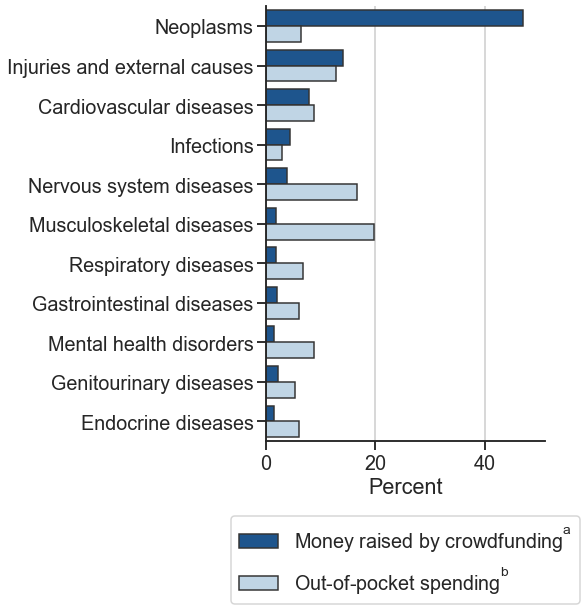

In [78]:
order = [
    'Neoplasms',
    'Injuries and external causes',
    'Cardiovascular diseases',
    'Infections',
    'Nervous system diseases',
    'Musculoskeletal diseases',
    'Respiratory diseases',
    'Gastrointestinal diseases',
    'Mental health disorders',
    'Genitourinary diseases',
    'Endocrine diseases'
]

sns.set(style="ticks")
sns.set_context('talk', font_scale=1.2)

plt.figure(figsize=(5, 8))
ax = sns.barplot(y='cat', x='spend', hue='type', data=spend_compare, edgecolor=".2", palette=pal, order = order)
ax.set_xlabel('Percent')
ax.set_title('')
ax.xaxis.grid(True)
ax.set_axisbelow(True)
ax.set_ylabel('')
legend_labels, _= ax.get_legend_handles_labels()
# ax.legend(legend_labels,[
#     'Money raised by $\mathregular{crowdfunding^{a}}$','Out-of-pocket $\mathregular{spending^{b}}$'],
#           title='',
#           bbox_to_anchor=(0.97, 0.15))

ax.legend(legend_labels,[
    'Money raised by $\mathregular{crowdfunding^{a}}$','Out-of-pocket $\mathregular{spending^{b}}$'],
          title='',
          bbox_to_anchor=(0.5, -0.15), loc='upper center')


ax.set(xlim=(0,51))


sns.despine()
#plt.savefig("../plots/00-FIGURE_2.eps", bbox_inches='tight')
plt.savefig("../plots/POSTER-FIGURE_2.eps", bbox_inches='tight')

In [82]:
spend_compare

,cat,spend,type
0,Neoplasms,53.383743,Money raised by crowdfunding
1,Injuries and external causes,15.896006,Money raised by crowdfunding
3,Cardiovascular diseases,8.951080,Money raised by crowdfunding
4,Infections,4.965163,Money raised by crowdfunding
5,Nervous system diseases,4.312924,Money raised by crowdfunding
6,Genitourinary diseases,2.518528,Money raised by crowdfunding
7,Gastrointestinal diseases,2.342147,Money raised by crowdfunding
8,Respiratory diseases,2.150500,Money raised by crowdfunding
9,Musculoskeletal diseases,2.132767,Money raised by crowdfunding
10,Mental health disorders,1.704922,Money raised by crowdfunding


# Figure 1

In [687]:
#to specify bounds of error bars 
#https://stackoverflow.com/questions/52767423/is-it-possible-to-input-values-for-confidence-interval-error-bars-on-seaborn-ba/52767847

In [79]:
formula = '''current_amount ~  
d_cardiovascular_diseases + 
d_endocrine_diseases + 
d_gastrointestinal_diseases + 
d_genitourinary_diseases + 
d_infections + 
d_injuries_and_external_causes + 
d_mental_and_substance_use_disorders + 
d_musculoskeletal_diseases + 
d_neoplasms + 
d_nervous_system_diseases + 
d_respiratory_diseases +
year + 
goal_amount +
median_income +
no_health_insurance +
C(census_region, Treatment(reference='South'))
'''.replace('\n','')

Find var_power that maximizes log-likelihood

In [80]:
#takes a few minutes
power = []
ll = []
for p in range(110,200,5):
    tweedie_model = sm.GLM.from_formula(formula=formula, data=master, 
                                        family=sm.genmod.families.family.Tweedie(var_power=p/100, eql=True))
    tweedie_results = tweedie_model.fit()
    llf = tweedie_model.loglike(tweedie_results.params)
    power.append(p/100)
    ll.append(llf)

In [81]:
tweedie = pd.DataFrame({'power':power,'ll':ll})
#tweedie.to_csv('../data/tweedie.csv', index=False)

In [82]:
power = tweedie.sort_values('ll', ascending=False)['power'].tolist()[0]

In [83]:
tweedie_model = sm.GLM.from_formula(formula=formula, data=master, 
                                    family=sm.genmod.families.family.Tweedie(var_power=power, eql=True))

In [84]:
tweedie_results = tweedie_model.fit()

In [85]:
#print(tweedie_results.summary())

In [86]:
twe_html = tweedie_results.summary().as_html()

In [87]:
twe_df = pd.read_html(twe_html, header=0)[1]

In [88]:
twe_df.columns = ['var','coef','std err','z','P>|z|','[0.025','0.975]']

In [89]:
def AddBeta(df):
    beta = df['coef'].round(2).astype(str) + ' (' + df['std err'].round(2).astype(str) + ')'
    res = pd.concat([df['var'],beta],axis=1)
    return res

def AddPer(df):
    exp_coef = (np.exp(df['coef']) - 1) * 100
    exp_low = (np.exp(df['[0.025']) - 1) * 100
    exp_high = (np.exp(df['0.975]']) - 1) * 100
    
    r = exp_coef.round(1).astype(str) + ' (' + exp_low.round(1).astype(str) + ', ' + exp_high.round(1).astype(str) + ')'
    #res = pd.concat([df['var'],r],axis=1)
    res = pd.concat([df['var'],exp_coef,exp_low,exp_high],axis=1)
    return res

In [90]:
#regression_beta = AddBeta(twe_df)
#beta.columns = ['var','beta']

regression_percent = AddPer(twe_df)
regression_percent.columns = ['var','per','ci_low','ci_high']

#pd.merge(beta, per, on='var').merge(twe_df[['var','P>|z|']], on='var').to_csv('../data/model_output.csv', index=False)

In [91]:
regression_beta = AddBeta(twe_df)
regression_beta.columns = ['var','beta']

pd.merge(regression_beta, regression_percent, on='var').merge(twe_df[['var','P>|z|']], on='var').to_csv('../data/model_output.csv', index=False)

In [92]:
#select disease category results from regression table
disease_rows = [k for k,v in disease_cat_map.items()]
regression_disease = regression_percent.loc[regression_percent['var'].isin(disease_rows),]

#rename disease category labels
regression_disease.replace(disease_cat_map, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [93]:
#order dataframe by disease category order on plot
regression_disease = regression_disease.set_index('var')

In [94]:
order = [
    'Neoplasms',
    'Injuries and external causes',
    'Cardiovascular diseases',
    'Infections',
    'Nervous system diseases',
    'Musculoskeletal diseases',
    'Respiratory diseases',
    'Gastrointestinal diseases',
    'Mental health disorders',
    'Genitourinary diseases',
    'Endocrine diseases'
]

regression_disease = regression_disease.loc[order]
regression_disease.reset_index(inplace=True)

In [95]:
regression_disease

,var,per,ci_low,ci_high
0,Neoplasms,27.979512,25.860001,30.212820
1,Injuries and external causes,12.075212,9.855975,14.339282
2,Cardiovascular diseases,3.862736,1.409846,6.289891
3,Infections,4.969537,2.122205,7.896257
4,Nervous system diseases,7.680681,4.602786,10.849141
5,Musculoskeletal diseases,-1.774075,-5.067113,1.612869
6,Respiratory diseases,5.011533,1.409846,8.762889
7,Gastrointestinal diseases,-2.332370,-5.729323,1.207229
8,Mental health disorders,-9.669950,-12.890131,-6.386914
9,Genitourinary diseases,-3.071830,-6.480480,0.400801


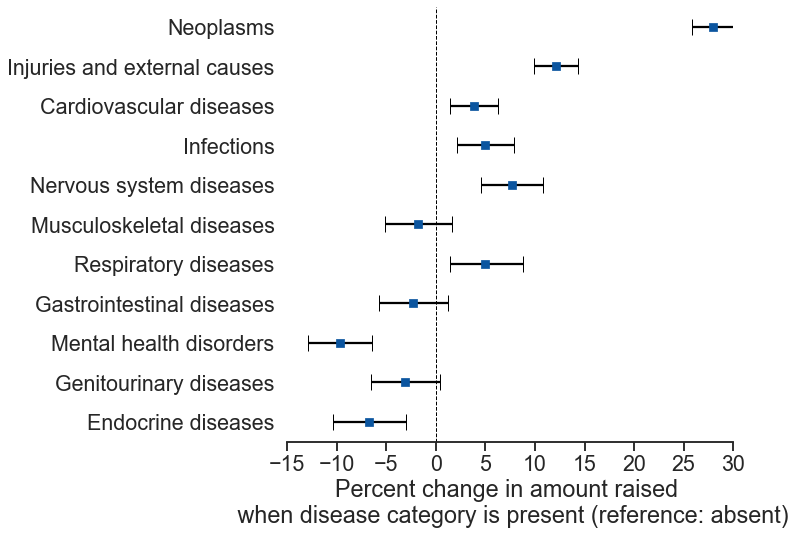

In [104]:

import matplotlib.ticker as ticker

sns.set(style="ticks")
sns.set_context('talk', font_scale=1.3)

plt.figure(figsize=(8, 8))


plt.errorbar(y=order,
             x=regression_disease['per'], 
             xerr=[regression_disease['per']-regression_disease['ci_low'],regression_disease['ci_high']-regression_disease['per']], 
             fmt='none', c= 'black', capsize=8)


ax = sns.scatterplot(y='var',x='per', data=regression_disease, marker='s', s=80, zorder=10, color=sns.color_palette('Blues')[5], edgecolor=sns.color_palette('Blues')[5])


ax.set_xlabel('Percent change in amount raised \n when disease category is present (reference: absent)')
ax.set_title('')
ax.set_axisbelow(True)
ax.set_ylabel('')
ax.axvline(x=0, linestyle='--', color='black', linewidth=1)
ax.tick_params(left=False)
ax.set(xlim=(-15,30))
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

# plt.subplots_adjust(left=0.3)
# plt.text(0.151, 0.9, 
#          'Disease $\mathregular{category^{a}}$', 
#          fontsize=12, 
#          fontweight='bold', 
#          #fontfamily='Helvetica',
#          transform=plt.gcf().transFigure)

sns.despine(trim=True, left=True)

#plt.savefig("../plots/00-FIGURE_1.eps", bbox_inches='tight')
plt.savefig("../plots/POSTER-FIGURE_reg.eps", bbox_inches='tight')

### Table 1

In [586]:
def fp(var, sort_idx=False):
    if sort_idx:
        df = pd.concat([master[var].value_counts(),master[var].value_counts(normalize=True)*100], axis=1).sort_index()
    else:
        df = pd.concat([master[var].value_counts(),master[var].value_counts(normalize=True)*100], axis=1)
    df.columns = ['freq','percent']
    return df

Number of unique disease categories per campaign

In [587]:
er['url'].nunique()

72860

In [588]:
master['any_disease_sum'] = master[master.columns[master.columns.str.startswith('d_')]].apply(lambda x: x.sum(), axis=1)

In [589]:
master[master['any_disease_sum']>0].shape

(72860, 66)

In [590]:
any_disease_sum = fp('any_disease_sum', True)

In [591]:
any_disease_sum.iloc[:3,]

,freq,percent
0,14589,16.682867
1,48206,55.124701
2,15724,17.980766


In [592]:
#3+ categories
any_disease_sum.iloc[3:,].apply(lambda x: sum(x), axis=0)

freq       8930.000000
percent      10.211666
dtype: float64

In [593]:
87449 - 72860

14589

Frequency of year

In [594]:
fp('year', True)

,freq,percent
2010,6,0.006861
2011,30,0.034306
2012,113,0.129218
2013,939,1.073769
2014,6638,7.590710
2015,16369,18.718339
2016,13089,14.967581
2017,10177,11.637640
2018,11199,12.806321
2019,15679,17.929307


# Table 2

Frequency of any disease category

In [49]:
#rename mental health disorders
master['primary_disease_cat'].replace({'Mental and substance use disorders':'Mental health disorders'}, inplace=True)
#placeholder variable for no disease
master['no_disease_count'] = [0 for x in master['url']]
#no disease county
master.loc[master['primary_disease_cat'] == 'No disease','no_disease_count'] = 1

#subset disease pivot table to urls in master
disease_pivot_sub = disease_pivot[disease_pivot['url'].isin(master['url'].tolist())]
#rename categories
disease_pivot_sub.rename(columns=disease_cat_map, inplace=True)
#add disease sub to master data
disease_pivot_sub = disease_pivot_sub.merge(master[['url','no_disease_count']], on='url', how='left')
#rename no disease category
disease_pivot_sub.rename(columns={'no_disease_count':'No disease'}, inplace=True)

#melt disease categories to calculate mutually inclusive frequency
disease_cat_melt = disease_pivot_sub[disease_pivot_sub.columns[1:]].melt()
#only keep disease categories that were mentioned to include in frequency calculation
disease_cat_melt = disease_cat_melt[disease_cat_melt['value'] > 0]

#frequency calculation
any_disease_freq = pd.concat([disease_cat_melt['variable'].value_counts(),(disease_cat_melt['variable'].value_counts()/87449)*100], axis=1).reset_index()
#rename columns
any_disease_freq.columns = ['Disease category','Any disease freq','Any disease percent']

Frequency of primary disease category

In [50]:
#frequency calculation
primary_disease_freq = pd.concat([master['primary_disease_cat'].value_counts(),(master['primary_disease_cat'].value_counts()/87449)*100], axis=1).reset_index()
#rename columns
primary_disease_freq.columns = ['Disease category','Primary disease freq','Primary disease percent']

Total spending by primary

In [51]:
primary_disease_spend = master[['current_amount','primary_disease_cat']].groupby('primary_disease_cat').agg('sum')
primary_disease_spend.reset_index(inplace=True)
primary_disease_spend.columns = ['Disease category','Primary disease spend total']
total_spending = master['current_amount'].sum()
primary_disease_spend['Primary disease spend percent'] = (primary_disease_spend['Primary disease spend total']/total_spending)*100

Median (IQR) sending by primary

In [52]:
#define interquartile range function
def IQR(x):
    return np.percentile(x, 75) - np.percentile(x, 25)

def per25(x):
    return np.percentile(x, 25)

def per75(x):
    return np.percentile(x, 75)

#group data by primary disease category
primary_disease_spend_summary = master[['current_amount','primary_disease_cat']].groupby('primary_disease_cat').agg([np.median, per25, per75]).reset_index()

#rename columns
primary_disease_spend_summary.columns = ['Disease category','Primary disease spend median','Primary disease spend 25','Primary disease spend 75']

Merge

In [53]:
tab2 = any_disease_freq.merge(primary_disease_freq, on='Disease category')
tab2 = tab2.merge(primary_disease_spend, on='Disease category')
tab2 = tab2.merge(primary_disease_spend_summary, on='Disease category')

#primary disease spending in millions
tab2['Primary disease spend total'] = tab2['Primary disease spend total']/1000000

#round values to whole numbers
tab2['Primary disease spend median'] = tab2['Primary disease spend median'].round().astype(int)
tab2['Primary disease spend 25'] = tab2['Primary disease spend 25'].round().astype(int)
tab2['Primary disease spend 75'] = tab2['Primary disease spend 75'].round().astype(int)

#round values to one decimal place
round_to_one = ['Any disease percent','Primary disease percent','Primary disease spend total','Primary disease spend percent']
for col in round_to_one:
    tab2[col] = tab2[col].round(1)

In [54]:
#combine columns for final table format
tab2['any_disease_freq'] = tab2['Any disease freq'].astype(str) + \
    ' (' + \
    tab2['Any disease percent'].astype(str) + \
    ')'

tab2['primary_disease_freq'] = tab2['Primary disease freq'].astype(str) + \
    ' (' + \
    tab2['Primary disease percent'].astype(str) + \
    ')'

tab2['primary_disease_spend'] = tab2['Primary disease spend total'].astype(str) + \
    ' (' + \
    tab2['Primary disease spend percent'].astype(str) + \
    ')'

tab2['primary_disease_med'] = tab2['Primary disease spend median'].astype(str) + \
    ' (' + \
    tab2['Primary disease spend 25'].astype(str) + \
    '-' + \
    tab2['Primary disease spend 75'].astype(str) + \
    ')'

tab2 = tab2[['Disease category','any_disease_freq','primary_disease_freq','primary_disease_spend','primary_disease_med']]

In [55]:
#export table
tab2.to_csv('../data/table_2.csv', index=False)

# eFigure 1

<AxesSubplot:>

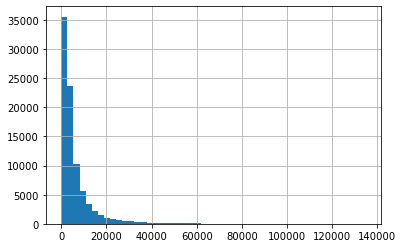

In [32]:
master['current_amount'].hist(bins=50)

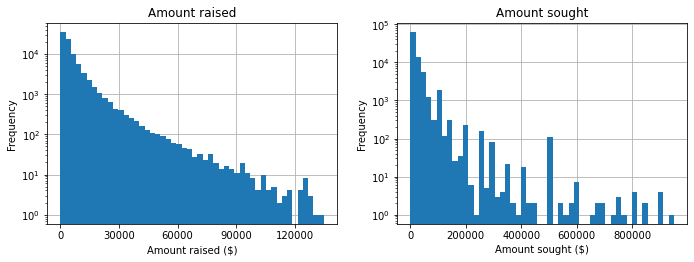

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# for row in axes:
#     for ax in row:
#         #ax.grid(zorder=0)
#         ax.set_axisbelow(True)

master['current_amount'].hist(bins=50, ax=axes[0])
axes[0].set_title('Amount raised')
axes[0].set_xlabel("Amount raised ($)")
axes[0].set_ylabel("Frequency")
axes[0].set_xticks(np.arange(0, 140000, 30000))
axes[0].set_axisbelow(True)
axes[0].set_yscale('log')

master['goal_amount'].hist(bins=50, ax=axes[1])
axes[1].set_title('Amount sought')
axes[1].set_xlabel("Amount sought ($)")
axes[1].set_ylabel("Frequency")
axes[1].set_axisbelow(True)
axes[1].set_yscale('log')

fig.tight_layout(pad=2)

fig.savefig('../plots/00-eFigure_1.eps')

# eFigure 2

In [45]:
pd.concat([master['primary_disease_cat'].value_counts(),master['primary_disease_cat'].value_counts()/87449], axis=1)

,primary_disease_cat,primary_disease_cat
Neoplasms,34791,0.397843
No disease,14589,0.166829
Injuries and external causes,11431,0.130716
Cardiovascular diseases,7566,0.086519
Infections,3594,0.041098
Nervous system diseases,3382,0.038674
Genitourinary diseases,2460,0.028131
Gastrointestinal diseases,2276,0.026027
Musculoskeletal diseases,2082,0.023808
Respiratory diseases,1867,0.021350


In [47]:
primary_disease_freq = (master['primary_disease_cat'].value_counts()/87449) * 100
primary_disease_freq = primary_disease_freq.reset_index()
primary_disease_freq.columns = ['cat','per']

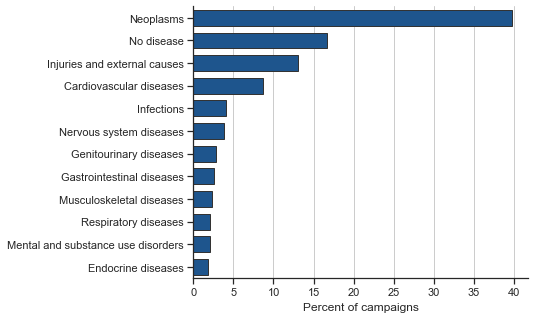

In [49]:
sns.set(style="ticks")

plt.figure(figsize=(6, 5))
ax = sns.barplot(y='cat', x='per', data=primary_disease_freq, color=sns.color_palette('Blues')[5], edgecolor=".2")
ax.set_xlabel('Percent of campaigns')
ax.set_title('')
ax.xaxis.grid(True)
ax.set_axisbelow(True)
ax.set_ylabel('')

widthbars = [0.7 for x in range(0,12)]
for bar, newwidth in zip(ax.patches, widthbars):
    y = bar.get_y()
    height = bar.get_height()
    centre = y + height/2.
    bar.set_y(centre - newwidth/2.)
    bar.set_height(newwidth)

#plt.tight_layout(pad=3)
sns.despine()
plt.savefig("../plots/00-eFigure_2.eps", bbox_inches='tight')

# ----------------
# Rest is OLD CODE
# ----------------

## Frequency of neighborhood deprivation index quartile

In [86]:
fp('ndi_quantile')

,freq,percent
1.0,54718,62.571327
2.0,19911,22.768699
3.0,9497,10.860044
4.0,3323,3.799929


## Number of unique conditions per campaign

In [148]:
# master['any_condition_sum'] = master[master.columns[master.columns.str.startswith('c_')]].apply(lambda x: x.sum(), axis=1)
# any_condition_sum = fp('any_condition_sum', True)
# any_condition_sum.iloc[:3,]
# #3+ conditions
# any_condition_sum.iloc[3:,].apply(lambda x: sum(x), axis=0)

## Rate of campaigns by population of census region

Population by census region

In [88]:
pop_by_region = census_regions.merge(state_pop, left_on='state', right_on='state_name', how='left')[['region','state_population']].groupby('region').agg(sum).to_dict()['state_population']

In [89]:
pop_by_region

{'Midwest': 68108086,
 'Northeast': 56033139,
 'South': 123408246,
 'West': 77148324}

In [90]:
census_counts = master['census_region'].value_counts().to_dict()

In [91]:
for reg in ['South','Northeast','West','Midwest']:
    rate = (census_counts[reg]/pop_by_region[reg])*100000
    print('Rate per 100,000 -- ',reg,': ',rate)

Rate per 100,000 --  South :  26.400991065054114
Rate per 100,000 --  Northeast :  24.717515825768746
Rate per 100,000 --  West :  30.23915334829568
Rate per 100,000 --  Midwest :  25.9719528750228


## Rate of campaigns by population of NDI quartile

In [92]:
county = pd.read_csv('../data/census/all_vars_by_county.csv')

In [93]:
county = county[['total_population','state_county_fips']]

In [94]:
county.columns = ['county_population','state_county_fips']

In [95]:
county['state_county_fips'] = county['state_county_fips'].astype(str).str.zfill(5)

In [96]:
master = master.merge(county, on='state_county_fips', how='left')

In [97]:
ndi_pop = master[['ndi_quantile', 'state_county_fips','county_population']]

In [98]:
ndi_pop = ndi_pop.drop_duplicates('state_county_fips')

In [99]:
pop_by_ndi = ndi_pop[['ndi_quantile','county_population']].groupby('ndi_quantile').agg(sum).to_dict()['county_population']

In [100]:
pop_by_ndi

{1.0: 182328046, 2.0: 75680450, 3.0: 43767013, 4.0: 20458554}

In [101]:
ndi_counts = master['ndi_quantile'].value_counts().to_dict()

In [102]:
for ndi in [1.0,2.0,3.0,4.0]:
    rate = (ndi_counts[ndi]/pop_by_ndi[ndi])*100000
    print('Rate per 100,000 -- ',ndi,': ',rate)

Rate per 100,000 --  1.0 :  30.010742285912503
Rate per 100,000 --  2.0 :  26.309304450488863
Rate per 100,000 --  3.0 :  21.698990515985177
Rate per 100,000 --  4.0 :  16.24259466235981


## Disease category by NDI quartile

In [103]:
disease_cat_melt = disease_pivot.melt(id_vars=['url'])
dz_by_ndi = pd.merge(master[['url','ndi_quantile']],disease_cat_melt, on='url', how='left')
dz_by_ndi = dz_by_ndi[dz_by_ndi['value'] > 0]

In [104]:
dz_by_ndi = pd.crosstab(dz_by_ndi['variable'], dz_by_ndi['ndi_quantile'])

In [105]:
dz_by_ndi.columns = ['1.0','2.0','3.0','4.0']

In [106]:
ndi_counts = master['ndi_quantile'].value_counts().to_dict()

In [107]:
# dz_by_ndi['1.0'] = (dz_by_ndi['1.0']/pop_by_ndi[1.0])*100000
# dz_by_ndi['2.0'] = (dz_by_ndi['2.0']/pop_by_ndi[2.0])*100000
# dz_by_ndi['3.0'] = (dz_by_ndi['3.0']/pop_by_ndi[3.0])*100000
# dz_by_ndi['4.0'] = (dz_by_ndi['4.0']/pop_by_ndi[4.0])*100000

dz_by_ndi['1.0'] = (dz_by_ndi['1.0']/ndi_counts[1.0])*100000
dz_by_ndi['2.0'] = (dz_by_ndi['2.0']/ndi_counts[2.0])*100000
dz_by_ndi['3.0'] = (dz_by_ndi['3.0']/ndi_counts[3.0])*100000
dz_by_ndi['4.0'] = (dz_by_ndi['4.0']/ndi_counts[4.0])*100000

In [108]:
#percent
dz_by_ndi_per = dz_by_ndi.apply(lambda r: r/r.sum(), axis=1).round(2) * 100

In [109]:
dz_by_ndi.round(3).astype(str).add(' (').add(dz_by_ndi_per.round(2).astype(str)).add(')')

,1.0,2.0,3.0,4.0
variable,,,,
d_cardiovascular_diseases,13269.856 (24.0),13901.863 (25.0),13446.351 (25.0),14053.566 (26.0)
d_endocrine_diseases,4250.886 (24.0),4625.584 (26.0),4190.797 (24.0),4483.9 (26.0)
d_gastrointestinal_diseases,5288.936 (24.0),5469.339 (25.0),5349.058 (24.0),5838.098 (27.0)
d_genitourinary_diseases,5117.146 (23.0),5529.607 (25.0),5580.71 (25.0),6139.031 (27.0)
d_infections,9951.022 (26.0),9698.157 (25.0),9687.27 (25.0),9058.08 (24.0)
d_injuries_and_external_causes,20320.553 (25.0),20797.549 (26.0),20511.741 (25.0),19049.052 (24.0)
d_mental_and_substance_use_disorders,5625.206 (29.0),5198.132 (27.0),4401.39 (23.0),4243.154 (22.0)
d_musculoskeletal_diseases,6231.953 (25.0),6503.943 (26.0),6317.785 (25.0),5868.191 (24.0)
d_neoplasms,43824.701 (26.0),42288.182 (25.0),42297.568 (25.0),42582.004 (25.0)


## Comparing amount of money raised in crowdfunding vs others

In [94]:
personal = pd.read_csv('../data/personal_spending.csv')
personal['type'] = ['US spending' for x in personal['cat']]
personal['spend'] = (personal['personal']/personal['personal'].sum())*100
del personal['personal']
personal

,cat,type,spend
0,Neoplasms,US spending,7.327915
1,Cardiovascular diseases,US spending,14.674879
2,Injuries and external causes,US spending,10.668021
3,Infections,US spending,8.255017
4,Nervous system diseases,US spending,6.432563
5,Musculoskeletal diseases,US spending,11.652273
6,Respiratory diseases,US spending,8.388367
7,Mental health disorders,US spending,11.925324
8,Gastrointestinal diseases,US spending,6.578613
9,Genitourinary diseases,US spending,6.413513


In [36]:
oop = pd.read_csv('../data/oop.csv')
oop.loc[oop['type'] == 'Total','total'] = (oop.loc[oop['type'] == 'Total','total']/oop.loc[oop['type'] == 'Total','total'].sum()) * 100
oop.loc[oop['type'] == 'OOP','total'] = (oop.loc[oop['type'] == 'OOP','total']/oop.loc[oop['type'] == 'OOP','total'].sum()) * 100
oop.rename(columns = {'total':'spend'},inplace=True)
oop.replace({'Total':'Total spending in US','OOP':'OOP spending'},inplace=True)

In [38]:
oop = oop[oop['type'] == 'OOP spending']

In [39]:
df = master[['current_amount','primary_disease_cat']].groupby('primary_disease_cat').agg('sum').sort_values('current_amount', ascending=False)
df.reset_index(inplace=True)
df = df[df['primary_disease_cat'] != 'No disease']
df

,primary_disease_cat,current_amount
0,Neoplasms,255905709.0
1,Injuries and external causes,76200702.0
3,Cardiovascular diseases,42908803.0
4,Infections,23801507.0
5,Nervous system diseases,20674868.0
6,Genitourinary diseases,12073071.0
7,Gastrointestinal diseases,11227555.0
8,Respiratory diseases,10308856.0
9,Musculoskeletal diseases,10223846.0
10,Mental and substance use disorders,8172885.0


In [40]:
df['cf_per'] = (df['current_amount']/df['current_amount'].sum())*100
df

,primary_disease_cat,current_amount,cf_per
0,Neoplasms,255905709.0,53.383743
1,Injuries and external causes,76200702.0,15.896006
3,Cardiovascular diseases,42908803.0,8.951080
4,Infections,23801507.0,4.965163
5,Nervous system diseases,20674868.0,4.312924
6,Genitourinary diseases,12073071.0,2.518528
7,Gastrointestinal diseases,11227555.0,2.342147
8,Respiratory diseases,10308856.0,2.150500
9,Musculoskeletal diseases,10223846.0,2.132767
10,Mental and substance use disorders,8172885.0,1.704922


In [41]:
df.rename(columns={'primary_disease_cat':'cat','cf_per':'spend'}, inplace=True)
del df['current_amount']

In [42]:
df['type'] = ['Crowdfunding' for x in df['cat']]

In [43]:
df.replace({'Mental and substance use disorders':'Mental health disorders'}, inplace=True)

In [44]:
asdf = pd.concat([df,oop], axis=0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


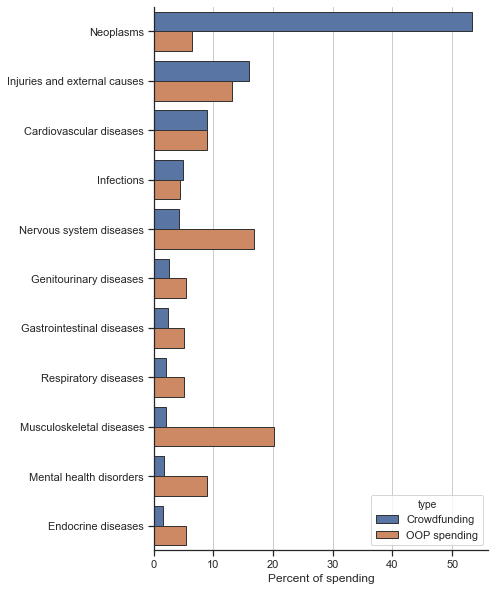

In [45]:
sns.set(style="ticks")

plt.figure(figsize=(6, 10))
ax = sns.barplot(y='cat', x='spend', hue='type', data=asdf, edgecolor=".2")
ax.set_xlabel('Percent of spending')
ax.set_title('')
ax.xaxis.grid(True)
ax.set_axisbelow(True)
ax.set_ylabel('')

sns.despine()
plt.savefig("../plots/00-FIGURE_X.eps", bbox_inches='tight')

## Amount raised by primary disease category

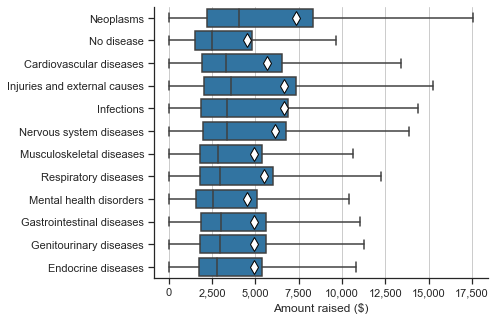

In [80]:
order = [
    'Neoplasms',
    'No disease',
    'Cardiovascular diseases',
    'Injuries and external causes',
    'Infections',
    'Nervous system diseases',
    'Musculoskeletal diseases',
    'Respiratory diseases',
    'Mental health disorders',
    'Gastrointestinal diseases',
    'Genitourinary diseases',
    'Endocrine diseases'
]

import matplotlib

sns.set(style="ticks")
plt.figure(figsize=(6, 5))
# ax = sns.barplot(data=master, y='primary_disease_cat', x='current_amount_winsor_5', order=order,
#                                                                         capsize=0.3, 
#                                                                         errwidth=2, 
#                                                                         color=sns.color_palette("tab10")[0],
#                                                                         edgecolor=".2", n_boot=10000)


ax = sns.boxplot(data=master, y='primary_disease_cat', x='current_amount', order=order, showmeans=True, showfliers=False, color=sns.color_palette("tab10")[0],
                 meanprops={"marker":"d",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
#ax.set_yticklabels(ax.get_yticklabels(), size=14)
#ax.set_xticklabels(ax.get_xticks().astype(int), size=14)
ax.set_ylabel('')
ax.set_xlabel('Amount raised ($)')
ax.xaxis.grid(True)
ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

widthbars = [0.7 for x in range(0,12)]
for bar, newwidth in zip(ax.patches, widthbars):
    y = bar.get_y()
    height = bar.get_height()
    centre = y + height/2.
    bar.set_y(centre - newwidth/2.)
    bar.set_height(newwidth)

sns.despine()
#plt.savefig("../plots/00-FIGURE_2.eps", bbox_inches='tight')

# Impact of adding mental health

In [81]:
master['disease'] = [np.nan for x in master['url']]
master['mod'] = [np.nan for x in master['url']]

master.loc[master['pd_neoplasms'] == 1,'disease'] = 'Neoplasms'
master.loc[master['pd_cardiovascular_diseases'] == 1,'disease'] = 'Cardiovascular'
master.loc[master['pd_nervous_system_diseases'] == 1,'disease'] = 'Nervous'
master.loc[master['pd_injuries_and_external_causes'] == 1,'disease'] = 'Injuries'

master.loc[(master['d_mental_and_substance_use_disorders'] == 0)&(master['d_endocrine_diseases'] == 0), 'mod'] = 'A-None'
master.loc[(master['d_mental_and_substance_use_disorders'] == 1)&(master['d_endocrine_diseases'] == 0), 'mod'] = 'B-Mental'
master.loc[(master['d_mental_and_substance_use_disorders'] == 0)&(master['d_endocrine_diseases'] == 1), 'mod'] = 'C-Endo'
master.loc[(master['d_mental_and_substance_use_disorders'] == 1)&(master['d_endocrine_diseases'] == 1), 'mod'] = 'D-Both'

add_sub = master[~master['disease'].isnull()]

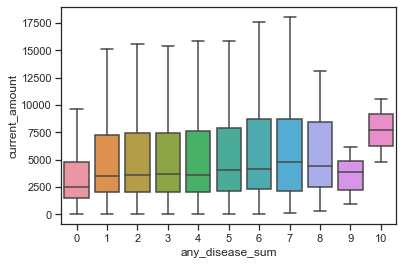

In [82]:
sns.boxplot(x='any_disease_sum',y='current_amount',data=master, showfliers=False)

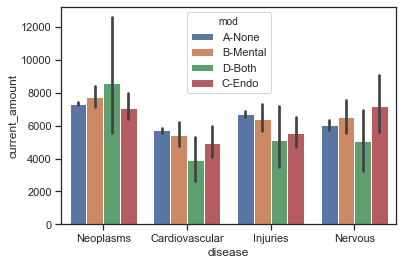

In [83]:
sns.barplot(x='disease',y='current_amount',data=add_sub,hue='mod')

In [ ]:
sns.barplot()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

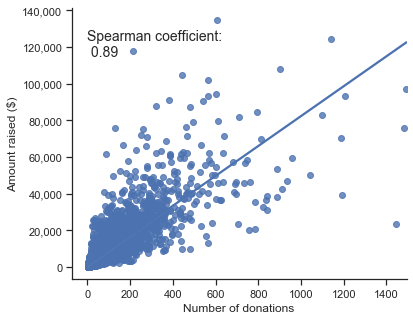

In [291]:
sns.set(style="ticks")
plt.figure(figsize=(6, 5))
ax = sns.regplot(x='donation_count',y='current_amount', data=master[:10000], scatter=True, ci=False)

ax.set_ylabel('Amount raised ($)')
ax.set_xlabel('Number of donations')
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.text(0, 115000, 'Spearman coefficient: \n 0.89', horizontalalignment='left', fontsize=14)
sns.despine()
plt.savefig("../plots/corr_1.eps", bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

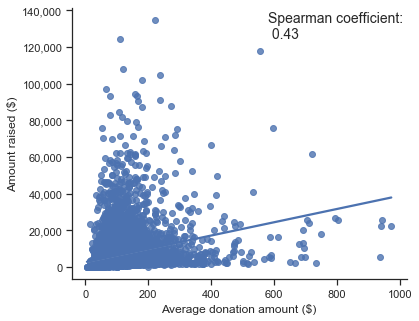

In [292]:
sns.set(style="ticks")
plt.figure(figsize=(6, 5))

ax = sns.regplot(x='donation_mean',y='current_amount', data=master[:10000], scatter=True, ci=False)
ax.set_ylabel('Amount raised ($)')
ax.set_xlabel('Average donation amount ($)')
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.text(580, 125000, 'Spearman coefficient: \n 0.43', horizontalalignment='left', fontsize=14)
sns.despine()
plt.savefig("../plots/corr_2.eps", bbox_inches='tight')

In [201]:
master[['donation_count','donation_mean','current_amount']].corr(method='spearman')

,donation_count,donation_mean,current_amount
donation_count,1.000000,-0.011763,0.869153
donation_mean,-0.011763,1.000000,0.423219
current_amount,0.869153,0.423219,1.000000


In [ ]:
order = [
    'Neoplasms',
    'No disease',
    'Cardiovascular diseases',
    'Injuries and external causes',
    'Infections',
    'Nervous system diseases',
    'Musculoskeletal diseases',
    'Gastrointestinal diseases',
    'Respiratory diseases',
    'Genitourinary diseases',
    'Mental and substance use disorders',
    'Endocrine diseases'
]

data = [
    {'cat':'Neoplasms','amt_rnk':1,''}
]

In [254]:
cnt = master[['primary_disease_cat','donation_count']].groupby('primary_disease_cat').agg('mean').sort_values(by='donation_count').reset_index()
amt = master[['primary_disease_cat','donation_mean']].groupby('primary_disease_cat').agg('mean').sort_values(by='donation_mean').reset_index()
raised = master[['primary_disease_cat','current_amount']].groupby('primary_disease_cat').agg('mean').sort_values(by='current_amount').reset_index()

In [255]:
df = raised.merge(cnt, on='primary_disease_cat', how='left')
df = df.merge(amt, on='primary_disease_cat', how='left')

In [256]:
df['current_amount'] = 12-df['current_amount'].rank()
df['donation_count'] = 12-df['donation_count'].rank()
df['donation_mean'] = 12-df['donation_mean'].rank()



In [257]:
df = df.melt(id_vars=['primary_disease_cat'])

In [258]:
df.head()

,primary_disease_cat,variable,value
0,No disease,current_amount,11.0
1,Mental and substance use disorders,current_amount,10.0
2,Endocrine diseases,current_amount,9.0
3,Musculoskeletal diseases,current_amount,8.0
4,Gastrointestinal diseases,current_amount,7.0


In [269]:
df.dtypes

primary_disease_cat     object
variable                object
value                  float64
dtype: object

(0, 45)

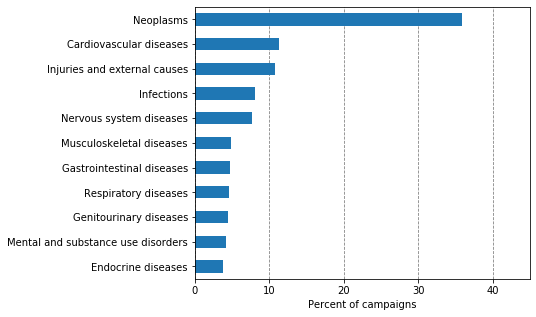

In [65]:
barplot_data = disease_cat_melt['variable'].value_counts(normalize=True).sort_values(ascending=True) * 100
plt.figure(figsize=(6, 5))
ax = barplot_data.plot(kind='barh')
ax.set_xlabel('Percent of campaigns')
ax.set_title('')
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.set_axisbelow(True)
plt.xticks(np.arange(0, 41, 10))
ax.set_xlim([0, 45])
#plt.savefig("../plots/any_disease_category_freq.eps", bbox_inches='tight')

#### Supp figure 1 - Primary disease category

In [288]:
master['primary_disease_cat'].replace({'Mental, behavioral, and substance use disorders':'Mental and substance use disorders'}, inplace=True)

In [676]:
fp('primary_disease_cat')

,freq,percent
Neoplasms,34791,39.784331
No disease,14589,16.682867
Injuries and external causes,11431,13.071619
Cardiovascular diseases,7566,8.651900
Infections,3594,4.109824
Nervous system diseases,3382,3.867397
Genitourinary diseases,2460,2.813068
Gastrointestinal diseases,2276,2.602660
Musculoskeletal diseases,2082,2.380816
Respiratory diseases,1867,2.134959


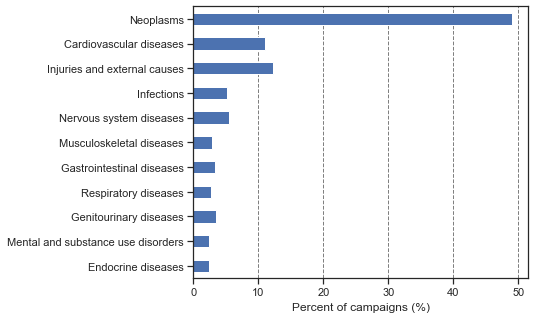

In [291]:
barplot_data = disease_cat_melt['variable'].value_counts(normalize=True).sort_values(ascending=True) * 100
cond_order = barplot_data.index.tolist()
barplot_data = master['primary_disease_cat'].value_counts(normalize=True).sort_values(ascending=True) * 100
barplot_data = barplot_data.reindex(index=cond_order)
plt.figure(figsize=(6, 5))
ax = barplot_data.plot(kind='barh')
ax.set_xlabel('Percent of campaigns (%)')
#ax.set_title('Primary disease category frequency')
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.set_axisbelow(True)
plt.savefig("../plots/primary_disease_category_freq.eps", bbox_inches='tight')

#### Supp figure 2 - Any condition

In [165]:
condition_cat_map = {
    'c_other_neoplasms':'Other neoplasms',
    'c_infections':'Infections',
    'c_hematologic_malignancies':'Hematologic malignancies',
    'c_injuries_and_external_causes':'Injuries and external causes',
    'c_breast_cancer':'Breast cancer',
    'c_other_neurologic_disorders':'Other neurologic disorders',
    'c_other_cardiovascular_disorders':'Other cardiovascular disorders',
    'c_cerebrovascular_diseas':'Cerebrovascular disease',
    'c_other_respiratory_disorders':'Other respiratory disorders',
    'c_musculoskeletal_diseases':'Musculoskeletal diseases',
    'c_mental_and_substance_use_disorders':'Mental and substance use disorders',
    'c_ckd_and_renal_failure':'CKD and renal failure',
    'c_other_gastrointestinal_disorders':'Other gastrointestinal disorders',
    'c_other_genitourinary_disorders':'Other genitourinary disorders',
    'c_lung_cancer':'Lung cancer',
    'c_diabetes':'Diabetes',
    'c_other_endocrine_disorders':'Other endocrine disorders',
    'c_liver_diseases':'Liver diseases',
    'c_coronary_artery_disease':'Coronary artery disease',
    'c_neurodegenerative_diseases':'Neurodegenerative diseases',
    'c_colorectal_cancer':'Colorectal cancer',
    'c_congenital_cardiac_defects':'Congenital cardiac defects',
    'c_congenital_neurologic_defects':'Congenital neurologic defects',
    'c_heart_failure':'Heart failure',
    'c_copd':'COPD'
}

In [166]:
int_pivot_sub = int_pivot[int_pivot['url'].isin(master['url'].tolist())]

In [167]:
l = sorted(master[~master['primary_int_cat'].isna()]['primary_int_cat'].unique().tolist())
l.insert(0, 'url')
int_pivot_sub.columns = l

In [168]:
int_cat_melt = int_pivot[int_pivot.columns[1:]].melt()
int_cat_melt = int_cat_melt[int_cat_melt['value'] > 0]
int_cat_melt['variable'].replace(condition_cat_map, inplace=True)

In [169]:
pd.concat([int_cat_melt['variable'].value_counts(),int_cat_melt['variable'].value_counts(normalize=True)], axis=1)

,variable,variable
Other neoplasms,34085,0.327479
Infections,6055,0.058175
Hematologic malignancies,5815,0.055869
Injuries and external causes,5687,0.054639
Breast cancer,5624,0.054034
Other neurologic disorders,5328,0.051190
Other cardiovascular disorders,4756,0.045694
c_cerebrovascular_disease,4710,0.045252
Other respiratory disorders,4307,0.041380
Musculoskeletal diseases,3897,0.037441


In [170]:
int_cat_melt = int_pivot[int_pivot.columns[1:]].melt()
int_cat_melt = int_cat_melt[int_cat_melt['value'] > 0]
pd.concat([int_cat_melt['variable'].value_counts(),int_cat_melt['variable'].value_counts(normalize=True)], axis=1)

,variable,variable
c_other_neoplasms,34085,0.327479
c_infections,6055,0.058175
c_hematologic_malignancies,5815,0.055869
c_injuries_and_external_causes,5687,0.054639
c_breast_cancer,5624,0.054034
c_other_neurologic_disorders,5328,0.051190
c_other_cardiovascular_disorders,4756,0.045694
c_cerebrovascular_disease,4710,0.045252
c_other_respiratory_disorders,4307,0.041380
c_musculoskeletal_diseases,3897,0.037441


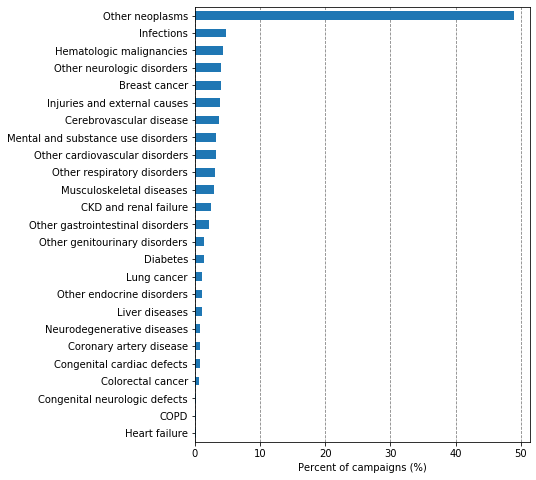

In [173]:
barplot_data = er['int_category'].value_counts(normalize=True).sort_values(ascending=True) * 100
plt.figure(figsize=(6, 8))
ax = barplot_data.plot(kind='barh')
ax.set_xlabel('Percent of campaigns (%)')
#ax.set_title('Condition frequency')
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.set_axisbelow(True)
plt.savefig("../plots/any_condition_freq.eps", bbox_inches='tight')

#### Supp figure 3 - Primary condition

In [172]:
pd.concat([master['primary_int_cat'].value_counts(), master['primary_int_cat'].value_counts(normalize=True)], axis=1)

,primary_int_cat,primary_int_cat
Other neoplasms,27829,0.432698
Injuries and external causes,3613,0.056177
Cerebrovascular disease,3309,0.051450
Hematologic malignancies,3029,0.047096
Infections,2903,0.045137
Other neurologic disorders,2799,0.043520
Other cardiovascular disorders,2542,0.039524
Breast cancer,2414,0.037534
Other respiratory disorders,2044,0.031781
Musculoskeletal diseases,1995,0.031019


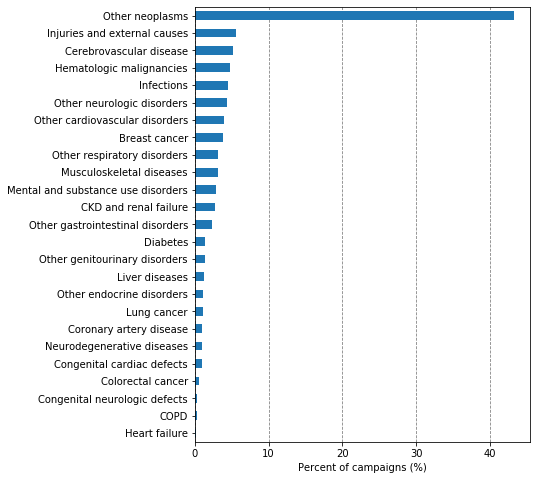

In [175]:
barplot_data = master['primary_int_cat'].value_counts(normalize=True).sort_values(ascending=True) * 100
plt.figure(figsize=(6, 8))
ax = barplot_data.plot(kind='barh')
ax.set_xlabel('Percent of campaigns (%)')
#ax.set_title('Primary condition frequency')
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.set_axisbelow(True)
plt.savefig("../plots/primary_condition_freq.eps", bbox_inches='tight')

#### Disease and condition frequencies in same chart

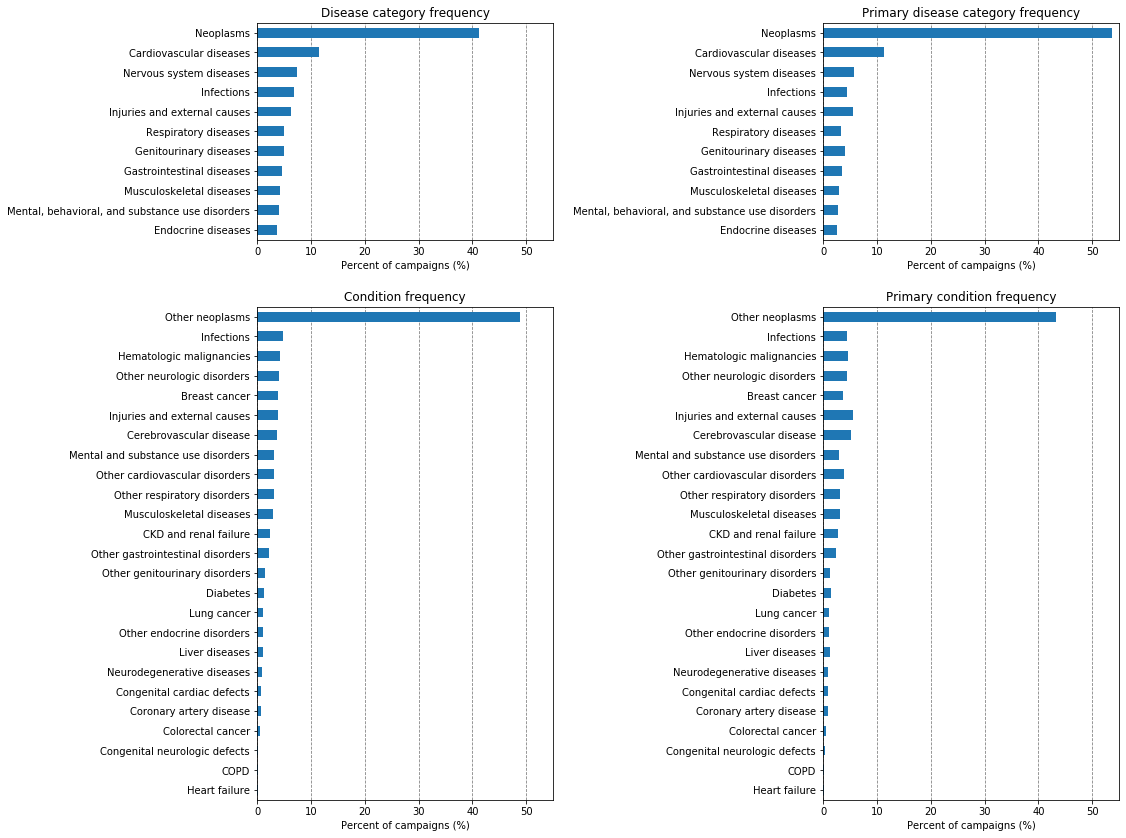

In [128]:
fig, axes = plt.subplots(nrows=2, ncols=2, gridspec_kw={'width_ratios':[1,1], 'height_ratios':[11,25]}, figsize=(16,12))

barplot_data = disease_cat_melt['variable'].value_counts(normalize=True).sort_values(ascending=True) * 100
barplot_data.plot(kind='barh', ax=axes[0,0])
axes[0,0].set_xlabel('Percent of campaigns (%)')
axes[0,0].set_title('Disease category frequency')
axes[0,0].xaxis.grid(color='gray', linestyle='dashed')
axes[0,0].set_axisbelow(True)
plt.xticks(np.arange(0, 55, 10))
axes[0,0].set_xlim([0, 55])

dz_order = barplot_data.index.tolist()

barplot_data = master['primary_disease_cat'].value_counts(normalize=True).sort_values(ascending=True) * 100
barplot_data = barplot_data.reindex(index=dz_order)
barplot_data.plot(kind='barh', ax=axes[0,1])
axes[0,1].set_xlabel('Percent of campaigns (%)')
axes[0,1].set_title('Primary disease category frequency')
axes[0,1].xaxis.grid(color='gray', linestyle='dashed')
axes[0,1].set_axisbelow(True)
plt.xticks(np.arange(0, 55, 10))
axes[0,1].set_xlim([0, 55])


barplot_data = er['int_category'].value_counts(normalize=True).sort_values(ascending=True) * 100
barplot_data.plot(kind='barh', ax=axes[1,0])
axes[1,0].set_xlabel('Percent of campaigns (%)')
axes[1,0].set_title('Condition frequency')
axes[1,0].xaxis.grid(color='gray', linestyle='dashed')
axes[1,0].set_axisbelow(True)
plt.xticks(np.arange(0, 55, 10))
axes[1,0].set_xlim([0, 55])

cond_order = barplot_data.index.tolist()

barplot_data = master['primary_int_cat'].value_counts(normalize=True).sort_values(ascending=True) * 100
barplot_data = barplot_data.reindex(index=cond_order)
barplot_data.plot(kind='barh', ax=axes[1,1])
axes[1,1].set_xlabel('Percent of campaigns (%)')
axes[1,1].set_title('Primary condition frequency')
axes[1,1].xaxis.grid(color='gray', linestyle='dashed')
axes[1,1].set_axisbelow(True)
plt.xticks(np.arange(0, 55, 10))
axes[1,1].set_xlim([0, 55])

fig.tight_layout(pad=2)

fig.savefig('../plots/all_disease_freq.eps')

#### Primary condition grouped by parent disease category

In [151]:
df = er['int_category'].value_counts(normalize=True).reset_index()
df.columns = ['int_category','count']
df = df.merge(er[['int_category','disease_category']].drop_duplicates('int_category'), on='int_category', how='left')

In [152]:
df = df.sort_values(['disease_category','count'], ascending=[True, False])

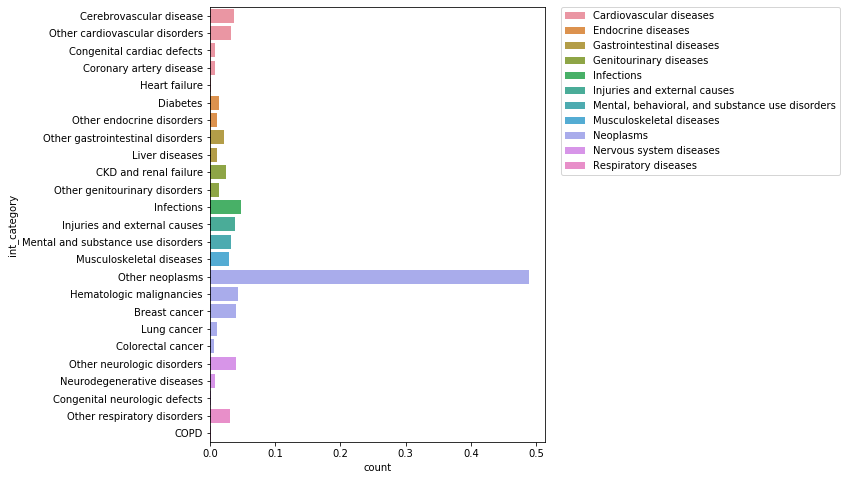

In [153]:
fig, ax = plt.subplots(figsize=(6,8))


sns.barplot(y='int_category', x="count", data=df, ax=ax, hue='disease_category', dodge=False)

#plt.yticks(y_pos)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Supp figure 4 - diseases over time

In [292]:
primary_disease_time = pd.crosstab(master['primary_disease_cat'], master['year'])
primary_disease_time = primary_disease_time.apply(lambda r: r/r.sum(), axis=0).round(3) * 100
primary_disease_time = primary_disease_time.reset_index()
primary_disease_time = pd.melt(primary_disease_time, id_vars=['primary_disease_cat'], 
                               value_vars=["2010","2011","2012",'2013','2014','2015','2016','2017','2018','2019','2020']) 

In [293]:
any_disease_year_wide = master[master.columns[(master.columns.str.startswith('d_'))|(master.columns.str.startswith('year'))]]
any_disease_year_long = pd.melt(any_disease_year_wide, id_vars=['year'])
any_disease_year_long = any_disease_year_long[any_disease_year_long['value'] == 1]
any_disease_year_long['variable'].replace(disease_cat_map, inplace=True)

any_disease_time = pd.crosstab(any_disease_year_long['variable'],any_disease_year_long['year'])
any_disease_time = any_disease_time.apply(lambda r: r/r.sum(), axis=0).round(3) * 100
any_disease_time = any_disease_time.reset_index()
any_disease_time = pd.melt(any_disease_time, id_vars=['variable'], 
                           value_vars=["2010","2011","2012",'2013','2014','2015','2016','2017','2018','2019','2020']) 
any_disease_time.columns = ['any_disease_cat','year','value']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


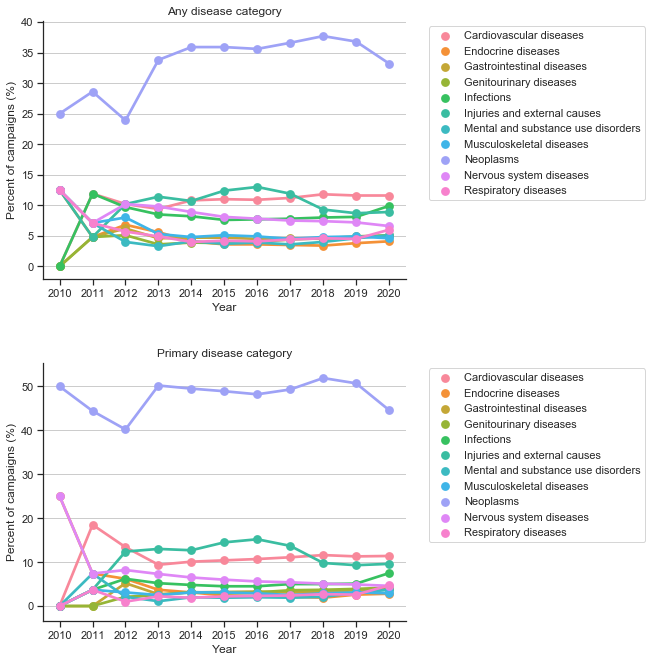

In [301]:
# #time = time[time['primary_cat'] == 'Cardiovascular diseases']
# sns.pointplot(x='year',y='value',hue='primary_disease_cat',data=time)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.xlabel('Year')
# plt.ylabel('Percent of campaigns')
# plt.savefig("../plots/primary_disease_time_freq.eps", bbox_inches='tight')



fig, axes = plt.subplots(2,1,figsize=(10,10))

sns.pointplot(x='year', y='value', hue='any_disease_cat', data=any_disease_time, join=True, scale=1, ax=axes[0])
axes[0].set_ylabel('Percent of campaigns (%)')
axes[0].set_xlabel('Year')
axes[0].yaxis.grid(True)
axes[0].set_title('Any disease category')
sns.despine()
axes[0].legend(bbox_to_anchor=(1.05, 1), loc=2)
#axes[0].legend([],[], frameon=False)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


sns.pointplot(x='year', y='value', hue='primary_disease_cat', data=primary_disease_time, join=True, scale=1, ax=axes[1])
axes[1].set_ylabel('Percent of campaigns (%)')
axes[1].set_xlabel('Year')
axes[1].yaxis.grid(True)
axes[1].set_title('Primary disease category')
sns.despine()
#axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12))
axes[1].legend(bbox_to_anchor=(1.05, 1), loc=2)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


fig.tight_layout(pad=3)

plt.savefig("../plots/disease_by_year.eps", bbox_inches='tight')

In [217]:
master['primary_disease_cat'].value_counts()

Neoplasms                             34153
No disease                            24039
Cardiovascular diseases                7236
Nervous system diseases                3573
Injuries and external causes           3524
Infections                             2784
Genitourinary diseases                 2622
Gastrointestinal diseases              2260
Respiratory diseases                   2053
Musculoskeletal diseases               1899
Mental and substance use disorders     1723
Endocrine diseases                     1583
Name: primary_disease_cat, dtype: int64

In [219]:
primary_cat.shape

(65176, 3)

### Figure 2

#### Finances by primary disease cateogry

In [294]:
master['hit_goal'].sum()

14224

Hit goal by primary disease category

In [295]:
hit_goal_df = pd.crosstab(master['hit_goal'],master['primary_disease_cat']).T

In [296]:
hit_goal_df.columns.name = ''

In [297]:
hit_goal_df['sum'] = hit_goal_df.apply(lambda x: x.sum(), axis=1)
hit_goal_df['per'] = (hit_goal_df[1]/hit_goal_df['sum']) * 100
hit_goal_df = hit_goal_df.reset_index()
hit_goal_df

,primary_disease_cat,0,1,sum,per
0,Cardiovascular diseases,6156,1081,7237,14.937129
1,Endocrine diseases,1353,230,1583,14.529375
2,Gastrointestinal diseases,1946,314,2260,13.893805
3,Genitourinary diseases,2276,345,2621,13.162915
4,Infections,2374,409,2783,14.696371
5,Injuries and external causes,3002,524,3526,14.861032
6,"Mental, behavioral, and substance use disorders",1409,314,1723,18.224028
7,Musculoskeletal diseases,1586,313,1899,16.482359
8,Neoplasms,28891,5271,34162,15.429425
9,Nervous system diseases,2911,666,3577,18.618954


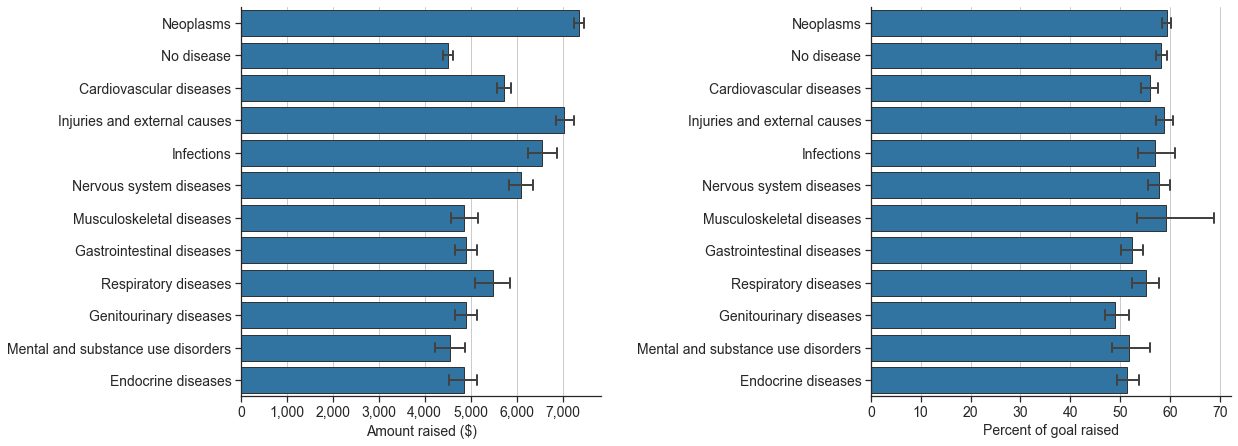

In [146]:
order = [
    'Neoplasms',
    'No disease',
    'Cardiovascular diseases',
    'Injuries and external causes',
    'Infections',
    'Nervous system diseases',
    'Musculoskeletal diseases',
    'Gastrointestinal diseases',
    'Respiratory diseases',
    'Genitourinary diseases',
    'Mental and substance use disorders',
    'Endocrine diseases'
]


import matplotlib

fig, axes = plt.subplots(1, 2, figsize=(18,7))


sns.set(style="ticks")
sns.barplot(data=master, y='primary_disease_cat', x='current_amount', order=order, 
                                                                        ax=axes[0], 
                                                                        capsize=0.3, 
                                                                        errwidth=2, 
                                                                        color=sns.color_palette("tab10")[0],
                                                                        edgecolor=".2")
axes[0].set_yticklabels(axes[0].get_yticklabels(), size=14)
axes[0].set_xticklabels(axes[0].get_xticks().astype(int), size=14)
axes[0].set_ylabel('')
axes[0].set_xlabel('Amount raised ($)', size=14)
axes[0].xaxis.grid(True)
axes[0].xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
sns.despine()


sns.set(style="ticks")
sns.barplot(data=master, y='primary_disease_cat', x='per_raised', order=order, 
                                                                    ax=axes[1], 
                                                                    capsize=0.3, 
                                                                    errwidth=2,
                                                                    color=sns.color_palette("tab10")[0],
                                                                   edgecolor=".2")
axes[1].set_yticklabels(axes[1].get_yticklabels(), size=14)
axes[1].set_xticklabels(axes[1].get_xticks().astype(int), size=14)
axes[1].set_ylabel('')
axes[1].set_xlabel('Percent of goal raised', size=14)
axes[1].xaxis.grid(True)
sns.despine()


fig.tight_layout(pad=3)

#fig.savefig('../plots/figure_2.eps')

In [304]:
master[['current_amount','primary_disease_cat']].groupby('primary_disease_cat').agg('mean')

,current_amount
primary_disease_cat,
Cardiovascular diseases,5718.635844
Endocrine diseases,4847.462237
Gastrointestinal diseases,4892.028088
Genitourinary diseases,4902.394580
Infections,6543.387446
Injuries and external causes,7037.640704
Mental and substance use disorders,4550.353286
Musculoskeletal diseases,4849.372137
Neoplasms,7350.777522


In [326]:
7350-4550

2800

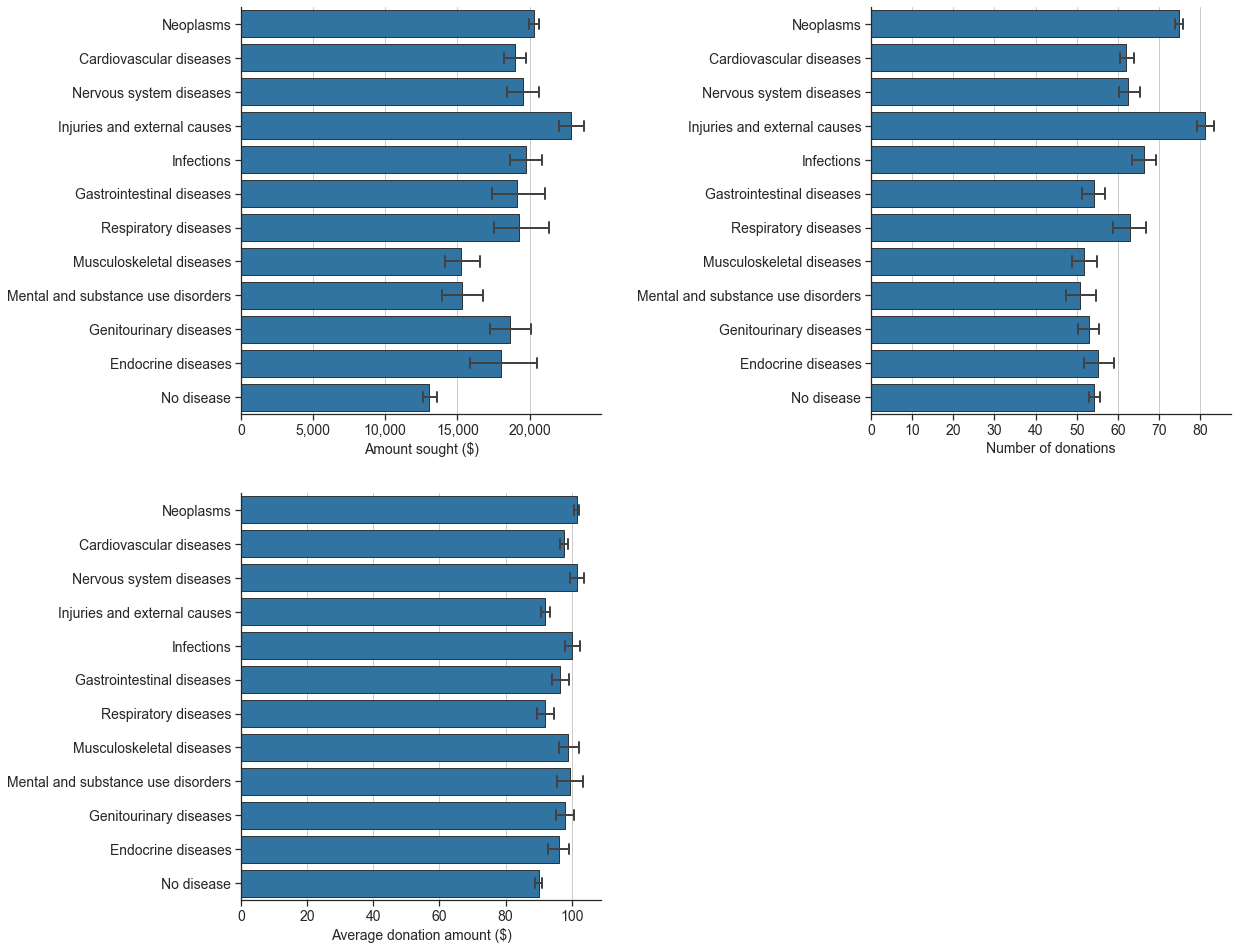

In [307]:

master.replace({'Mental, behavioral, and substance use disorders':'Mental and substance use disorders'}, inplace=True)

order = ['Neoplasms',
         'Cardiovascular diseases',
         'Nervous system diseases',
         'Injuries and external causes',
         'Infections',
         'Gastrointestinal diseases',
         'Respiratory diseases',
         'Musculoskeletal diseases',
         'Mental and substance use disorders',
         'Genitourinary diseases',
         'Endocrine diseases',
        'No disease']


import matplotlib

color = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

fig, axes = plt.subplots(2, 2, figsize=(18,14))


sns.set(style="ticks")
sns.barplot(data=master, y='primary_disease_cat', x='goal_amount', order=order, 
                                                                        ax=axes[0,0], 
                                                                        capsize=0.3, 
                                                                        errwidth=2, 
                                                                        color=color,
                                                                        edgecolor=".2")
axes[0,0].set_yticklabels(axes[0,0].get_yticklabels(), size=14)
axes[0,0].set_xticklabels(axes[0,0].get_xticks().astype(int), size=14)
axes[0,0].set_ylabel('')
axes[0,0].set_xlabel('Amount sought ($)', size=14)
axes[0,0].xaxis.grid(True)
axes[0,0].xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
sns.despine()


sns.set(style="ticks")
sns.barplot(data=master, y='primary_disease_cat', x='donation_count', order=order, 
                                                                    ax=axes[0,1], 
                                                                    capsize=0.3, 
                                                                    errwidth=2,
                                                                    color=color,
                                                                   edgecolor=".2")
axes[0,1].set_yticklabels(axes[0,1].get_yticklabels(), size=14)
axes[0,1].set_xticklabels(axes[0,1].get_xticks().astype(int), size=14)
axes[0,1].set_ylabel('')
axes[0,1].set_xlabel('Number of donations', size=14)
axes[0,1].xaxis.grid(True)
sns.despine()

sns.set(style="ticks")
sns.barplot(data=master, y='primary_disease_cat', x='donation_mean', order=order, 
                                                                    ax=axes[1,0], 
                                                                    capsize=0.3, 
                                                                    errwidth=2,
                                                                    color=color,
                                                                   edgecolor=".2")
axes[1,0].set_yticklabels(axes[1,0].get_yticklabels(), size=14)
axes[1,0].set_xticklabels(axes[1,0].get_xticks().astype(int), size=14)
axes[1,0].set_ylabel('')
axes[1,0].set_xlabel('Average donation amount ($)', size=14)
axes[1,0].xaxis.grid(True)
sns.despine()

fig.delaxes(axes[1,1])

fig.tight_layout(pad=3)

fig.savefig('../plots/success_suppl.eps')

In [84]:
pd.crosstab(master['census_region'], master['ndi_quantile'])

ndi_quantile,1.0,2.0,3.0,4.0
census_region,,,,
Midwest,10875,4213,2300,301
Northeast,10692,2243,790,125
South,15205,9238,5216,2922
West,17424,4119,1338,448


In [86]:
pd.crosstab(master['census_region'], master['ndi_quantile']).apply(lambda r: r/r.sum(), axis=1).round(2) * 100

ndi_quantile,1.0,2.0,3.0,4.0
census_region,,,,
Midwest,61.0,24.0,13.0,2.0
Northeast,77.0,16.0,6.0,1.0
South,47.0,28.0,16.0,9.0
West,75.0,18.0,6.0,2.0


In [87]:
from scipy import stats

In [88]:
stats.chi2_contingency(pd.crosstab(master['census_region'], master['ndi_quantile']))

(7676.149442724154,
 0.0,
 9,
 array([[10962.65302062,  4007.73201523,  1950.7680591 ,   767.84690505],
        [ 8583.45549978,  3137.94383012,  1527.39768322,   601.20298688],
        [20191.88185114,  7381.75797322,  3593.07898318,  1414.28119247],
        [14458.00962847,  5285.56618143,  2572.7552745 ,  1012.6689156 ]]))

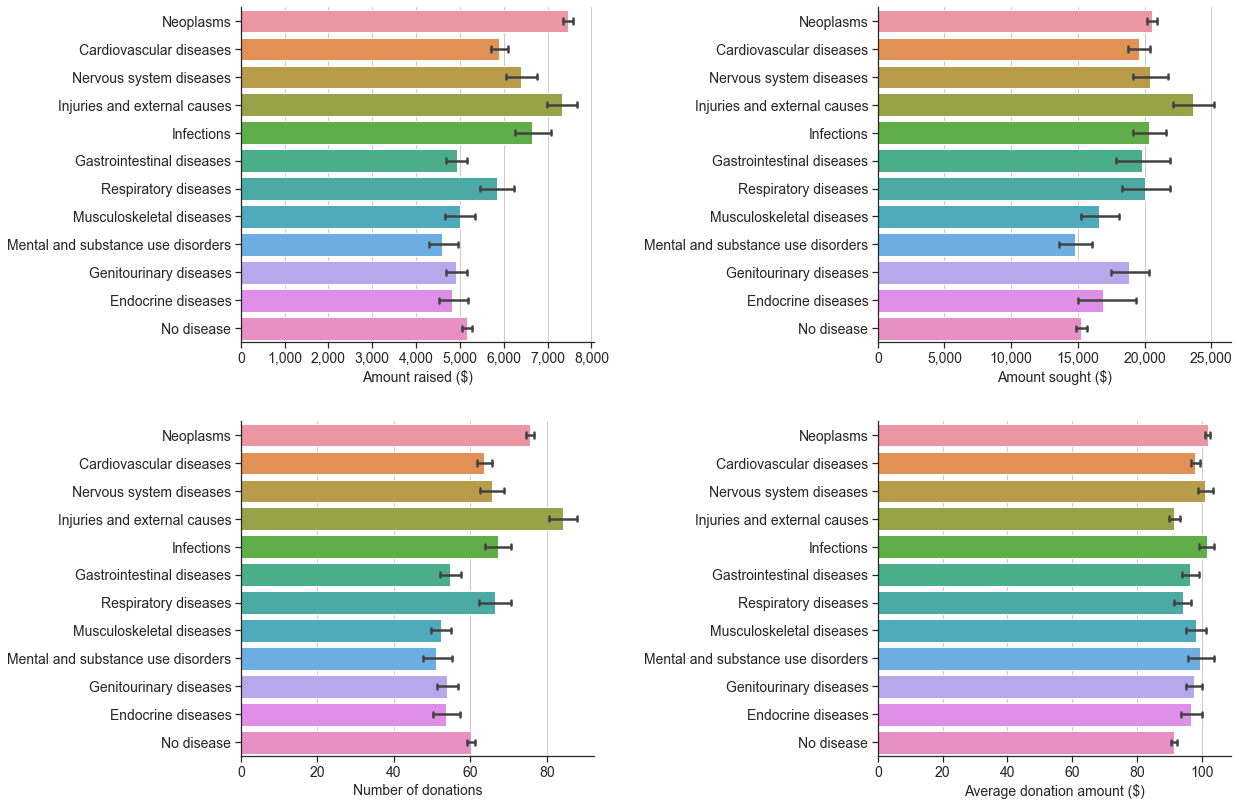

In [414]:
# master.replace({'Mental, behavioral, and substance use disorders':'Mental and substance use disorders'}, inplace=True)

# order = ['Neoplasms','Cardiovascular diseases','Nervous system diseases','Injuries and external causes', 'Infections','Gastrointestinal diseases','Respiratory diseases','Musculoskeletal diseases','Mental and substance use disorders','Genitourinary diseases','Endocrine diseases']

# import string

# fig, axes = plt.subplots(3, 2, figsize=(15,17))

# pal = sns.color_palette()

# sns.set(style="ticks")
# sns.pointplot(data=master, y='primary_disease_cat',x='current_amount_winsor_25', join=False, capsize=0.15, order=order, ax=axes[0,0], scale=1, errwidth=2)
# #axes[0,0].set_yticklabels(axes[0,0].get_yticklabels(), rotation=30, ha="right", size=14)
# axes[0,0].set_yticklabels(axes[0,0].get_yticklabels(), size=14)
# axes[0,0].set_ylabel('')
# axes[0,0].set_xlabel('Current amount ($)', size=14)
# axes[0,0].xaxis.grid(True)
# #axes[0,0].get_legend().remove()
# sns.despine()

# sns.set(style="ticks")
# sns.pointplot(data=master, y='primary_disease_cat', x='goal_amount_winsor_25', join=False, capsize=0.15, order=order, ax=axes[0,1], scale=1, errwidth=2)
# axes[0,1].set_yticklabels(axes[0,1].get_yticklabels(), size=14)
# axes[0,1].set_ylabel('')
# axes[0,1].set_xlabel('Goal amount ($)', size=14)
# axes[0,1].xaxis.grid(True)
# #axes[0,1].get_legend().remove()
# sns.despine()

# sns.set(style="ticks")
# sns.pointplot(data=master, y='primary_disease_cat', x='donation_amount_winsor_25', join=False, capsize=0.15, order=order, ax=axes[1,0], scale=1, errwidth=2)
# axes[1,0].set_yticklabels(axes[1,0].get_yticklabels(), size=14)
# axes[1,0].set_ylabel('')
# axes[1,0].set_xlabel('Average donation amount ($)', size=14)
# axes[1,0].xaxis.grid(True)
# #axes[1,0].get_legend().remove()
# sns.despine()

# sns.set(style="ticks")
# sns.pointplot(data=master, y='primary_disease_cat', x='donation_count_winsor_25', join=False, capsize=0.15, order=order, ax=axes[1,1], scale=1, errwidth=2)
# axes[1,1].set_yticklabels(axes[1,1].get_yticklabels(), size=14)
# axes[1,1].set_ylabel('')
# axes[1,1].set_xlabel('Donation count', size=14)
# axes[1,1].xaxis.grid(True)
# #axes[1,1].get_legend().remove()
# sns.despine()

# sns.set(style="ticks")
# sns.pointplot(data=master, y='primary_disease_cat', x='per_raised_winsor_25', join=False, capsize=0.15, order=order, ax=axes[2,0], scale=1, errwidth=2)
# axes[2,0].set_yticklabels(axes[2,0].get_yticklabels(), size=14)
# #axes[1,1].set_yticklabels(axes[1,1].get_yticklabels(), size=14)
# axes[2,0].set_ylabel('')
# axes[2,0].set_xlabel('Percent of goal raised (%)', size=14)
# axes[2,0].xaxis.grid(True)
# #axes[1,1].get_legend().remove()
# sns.despine()

# sns.set(style="ticks")
# sns.barplot(data=hit_goal_df, y='primary_disease_cat', x='per', order=order, ax=axes[2,1], color='#1f77b4')
# axes[2,1].set_yticklabels(axes[2,1].get_yticklabels(),size=14)
# axes[2,1].set_ylabel('')
# axes[2,1].set_xlabel('Percent of campaigns that reached goal (%)', size=14)
# axes[2,1].xaxis.grid(True, zorder=0)
# #axes[2,1].get_legend().remove()
# sns.despine()






# master.replace({'Mental, behavioral, and substance use disorders':'Mental and substance use disorders'}, inplace=True)

# order = ['Neoplasms','Cardiovascular diseases','Nervous system diseases','Injuries and external causes', 'Infections','Gastrointestinal diseases','Respiratory diseases','Musculoskeletal diseases','Mental and substance use disorders','Genitourinary diseases','Endocrine diseases']


# fig, axes = plt.subplots(1, 2, figsize=(18,6))


# sns.set(style="ticks")
# sns.boxplot(data=master, y='primary_disease_cat', x='current_amount_winsor_25', order=order, ax=axes[0], showfliers=False, whis=0)
# axes[0].set_yticklabels(axes[0].get_yticklabels(), size=14)
# axes[0].set_xticklabels(axes[0].get_xticks().astype(int), size=14)
# axes[0].set_ylabel('')
# axes[0].set_xlabel('Amount raised ($)', size=14)
# axes[0].xaxis.grid(True)
# axes[0].xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
# sns.despine()


# sns.set(style="ticks")
# sns.boxplot(data=master, y='primary_disease_cat', x='per_raised_winsor_25', order=order, ax=axes[1], showfliers=False)
# axes[1].set_yticklabels(axes[1].get_yticklabels(), size=14)
# axes[1].set_xticklabels(axes[1].get_xticks().astype(int), size=14)
# axes[1].set_ylabel('')
# axes[1].set_xlabel('Percent of goal raised (%)', size=14)
# axes[1].xaxis.grid(True)
# sns.despine()


# fig.tight_layout(pad=3)

# fig.savefig('../plots/figure_2.eps')






master.replace({'Mental, behavioral, and substance use disorders':'Mental and substance use disorders'}, inplace=True)

order = ['Neoplasms',
         'Cardiovascular diseases',
         'Nervous system diseases',
         'Injuries and external causes',
         'Infections',
         'Gastrointestinal diseases',
         'Respiratory diseases',
         'Musculoskeletal diseases',
         'Mental and substance use disorders',
         'Genitourinary diseases',
         'Endocrine diseases',
        'No disease']

import matplotlib

fig, axes = plt.subplots(2, 2, figsize=(18,12))

for row in axes:
    for ax in row:
        ax.grid(zorder=0)


sns.set(style="ticks")
sns.barplot(data=master, y='primary_disease_cat', x='current_amount', order=order, ax=axes[0,0], capsize=0.2, errwidth=2.5)
axes[0,0].set_yticklabels(axes[0,0].get_yticklabels(), size=14)
axes[0,0].set_xticklabels(axes[0,0].get_xticks().astype(int), size=14)
axes[0,0].set_ylabel('')
axes[0,0].set_xlabel('Amount raised ($)', size=14)
axes[0,0].xaxis.grid(True)
axes[0,0].xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
sns.despine()


sns.set(style="ticks")
sns.barplot(data=master, y='primary_disease_cat', x='goal_amount', order=order, ax=axes[0,1], capsize=0.2, errwidth=2.5)
axes[0,1].set_yticklabels(axes[0,1].get_yticklabels(), size=14)
axes[0,1].set_xticklabels(axes[0,1].get_xticks().astype(int), size=14)
axes[0,1].set_ylabel('')
axes[0,1].set_xlabel('Amount sought ($)', size=14)
axes[0,1].xaxis.grid(True)
axes[0,1].xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
sns.despine()

sns.set(style="ticks")
sns.barplot(data=master, y='primary_disease_cat', x='donation_count', order=order, ax=axes[1,0], capsize=0.2, errwidth=2.5)
axes[1,0].set_yticklabels(axes[1,0].get_yticklabels(), size=14)
axes[1,0].set_xticklabels(axes[1,0].get_xticks().astype(int), size=14)
axes[1,0].set_ylabel('')
axes[1,0].set_xlabel('Number of donations', size=14)
axes[1,0].xaxis.grid(True)
sns.despine()

sns.set(style="ticks")
sns.barplot(data=master, y='primary_disease_cat', x='donation_mean',order=order, ax=axes[1,1], capsize=0.2, errwidth=2.5)
axes[1,1].set_yticklabels(axes[1,1].get_yticklabels(), size=14)
axes[1,1].set_xticklabels(axes[1,1].get_xticks().astype(int), size=14)
axes[1,1].set_ylabel('')
axes[1,1].set_xlabel('Average donation amount ($)', size=14)
axes[1,1].xaxis.grid(True)
sns.despine()

# sns.set(style="ticks")
# sns.pointplot(data=master, y='primary_disease_cat', x='per_raised_winsor_25', join=False, capsize=0.15, order=order, ax=axes[2,0], scale=1, errwidth=2)
# axes[2,0].set_yticklabels(axes[2,0].get_yticklabels(), size=14)
# axes[2,0].set_xticklabels(axes[2,0].get_xticks().astype(int), size=14)
# axes[2,0].set_ylabel('')
# axes[2,0].set_xlabel('Percent of amount sought raised (%)', size=14)
# axes[2,0].xaxis.grid(True)
# sns.despine()

# sns.set(style="ticks")
# sns.barplot(data=hit_goal_df, y='primary_disease_cat', x='per', order=order, ax=axes[2,1], color='#1f77b4')
# axes[2,1].set_yticklabels(axes[2,1].get_yticklabels(),size=14)
# axes[2,1].set_xticklabels(axes[2,1].get_xticks().astype(int), size=14)
# axes[2,1].set_ylabel('')
# axes[2,1].set_xlabel('Percent of campaigns that reached goal (%)', size=14)
# axes[2,1].xaxis.grid(True, zorder=0)
# #axes[2,1].get_legend().remove()
# sns.despine()



fig.tight_layout(pad=3)

fig.savefig('../plots/figure_2_full.eps')




#### Finances by any disease category

In [324]:
disease_cat_melt = disease_pivot_sub.melt(id_vars=['url'])

In [327]:
disease_cat_melt['variable'].replace(disease_cat_map, inplace=True)

In [329]:
disease_cat_melt.columns = ['url','cat','present']

In [330]:
a = pd.merge(master, disease_cat_melt, on='url', how='left')

In [333]:
order = ['Neoplasms','Cardiovascular diseases','Nervous system diseases','Injuries and external causes', 'Infections','Gastrointestinal diseases','Respiratory diseases','Musculoskeletal diseases','Mental and substance use disorders','Genitourinary diseases','Endocrine diseases']

In [336]:
a.replace({'Mental, behavioral, and substance use disorders':'Mental and substance use disorders'}, inplace=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


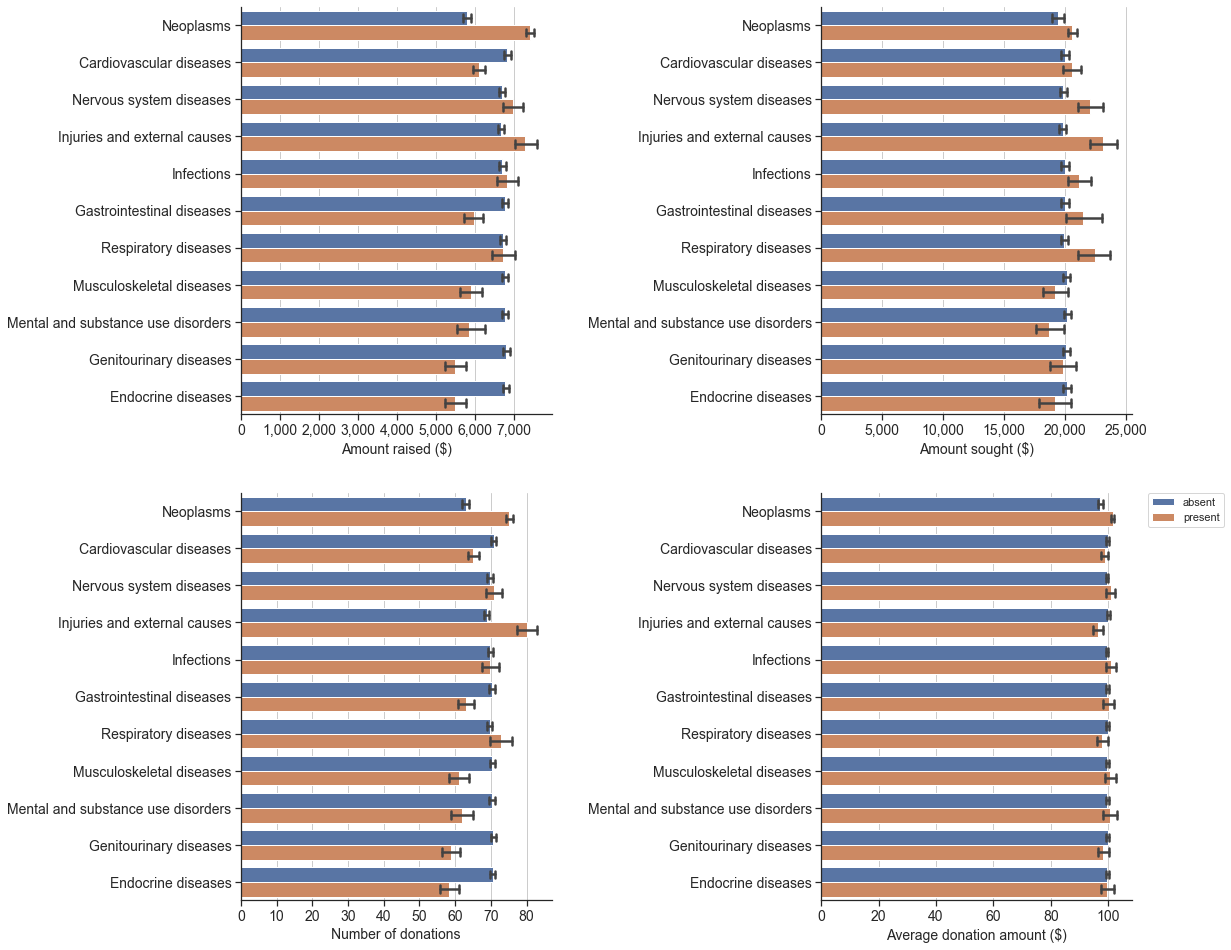

In [353]:
import matplotlib

fig, axes = plt.subplots(2, 2, figsize=(18,14))

for row in axes:
    for ax in row:
        ax.grid(zorder=0)


sns.set(style="ticks")
sns.barplot(y="cat", x="current_amount", hue='present_lab', data=a, order=order, ax=axes[0,0], capsize=0.2, errwidth=2.5)
axes[0,0].set_yticklabels(axes[0,0].get_yticklabels(), size=14)
axes[0,0].set_xticklabels(axes[0,0].get_xticks().astype(int), size=14)
axes[0,0].set_ylabel('')
axes[0,0].set_xlabel('Amount raised ($)', size=14)
axes[0,0].xaxis.grid(True)
axes[0,0].xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
axes[0,0].get_legend().remove()
sns.despine()


sns.set(style="ticks")
sns.barplot(y="cat", x="goal_amount", hue='present_lab', data=a, order=order, ax=axes[0,1], capsize=0.2, errwidth=2.5)
axes[0,1].set_yticklabels(axes[0,1].get_yticklabels(), size=14)
axes[0,1].set_xticklabels(axes[0,1].get_xticks().astype(int), size=14)
axes[0,1].set_ylabel('')
axes[0,1].set_xlabel('Amount sought ($)', size=14)
axes[0,1].xaxis.grid(True)
axes[0,1].xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
axes[0,1].get_legend().remove()
sns.despine()

sns.set(style="ticks")
sns.barplot(y="cat", x="donation_count", hue='present_lab', data=a, order=order, ax=axes[1,0], capsize=0.2, errwidth=2.5)
axes[1,0].set_yticklabels(axes[1,0].get_yticklabels(), size=14)
axes[1,0].set_xticklabels(axes[1,0].get_xticks().astype(int), size=14)
axes[1,0].set_ylabel('')
axes[1,0].set_xlabel('Number of donations', size=14)
axes[1,0].xaxis.grid(True)
axes[1,0].get_legend().remove()
sns.despine()

sns.set(style="ticks")
sns.barplot(y="cat", x="donation_mean", hue='present_lab', data=a, order=order, ax=axes[1,1], capsize=0.2, errwidth=2.5)
axes[1,1].set_yticklabels(axes[1,1].get_yticklabels(), size=14)
axes[1,1].set_xticklabels(axes[1,1].get_xticks().astype(int), size=14)
axes[1,1].set_ylabel('')
axes[1,1].set_xlabel('Average donation amount ($)', size=14)
axes[1,1].xaxis.grid(True)
#axes[1,1].get_legend().remove()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

fig.tight_layout(pad=3)

#fig.savefig('../plots/figure_2_present_absent.eps')

### Frequency of disease categories by census region

In [248]:
d_by_region.round(3).astype(str).add(' (').add(d_by_region_per.round(2).astype(str)).add(')')

,Midwest,Northeast,South,West
primary_disease_cat,,,,
Cardiovascular diseases,2.285 (25.0),2.022 (23.0),2.241 (25.0),2.419 (27.0)
Endocrine diseases,0.537 (27.0),0.437 (22.0),0.498 (25.0),0.516 (26.0)
Gastrointestinal diseases,0.658 (24.0),0.56 (20.0),0.759 (28.0),0.771 (28.0)
Genitourinary diseases,0.722 (23.0),0.742 (23.0),0.909 (29.0),0.814 (26.0)
Infections,0.881 (25.0),0.842 (24.0),0.814 (23.0),0.975 (28.0)
Injuries and external causes,1.107 (25.0),0.958 (22.0),1.032 (23.0),1.309 (30.0)
"Mental, behavioral, and substance use disorders",0.554 (25.0),0.525 (23.0),0.508 (23.0),0.668 (30.0)
Musculoskeletal diseases,0.596 (25.0),0.503 (21.0),0.595 (25.0),0.678 (29.0)
Neoplasms,10.566 (25.0),10.192 (24.0),10.034 (24.0),11.854 (28.0)


In [162]:
#rate of crowdfunding campaign for a given diagnosis per population of 100,000
d_by_region['Midwest'] = (d_by_region['Midwest']/pop_by_region['Midwest'])*100000
d_by_region['Northeast'] = (d_by_region['Northeast']/pop_by_region['Northeast'])*100000
d_by_region['South'] = (d_by_region['South']/pop_by_region['South'])*100000
d_by_region['West'] = (d_by_region['West']/pop_by_region['West'])*100000

#percent
d_by_region_per = d_by_region.apply(lambda r: r/r.sum(), axis=1).round(2) * 100

Any disease category

In [206]:
disease_cat_census_melt = disease_pivot.melt(id_vars=['url'])
dz_by_region = pd.merge(master[['url','census_region']],disease_cat_census_melt, on='url', how='left')
dz_by_region = dz_by_region[dz_by_region['value'] > 0]

In [209]:
dz_by_region = pd.crosstab(dz_by_region['variable'], dz_by_region['census_region'])

dz_by_region['Midwest'] = (dz_by_region['Midwest']/pop_by_region['Midwest'])*100000
dz_by_region['Northeast'] = (dz_by_region['Northeast']/pop_by_region['Northeast'])*100000
dz_by_region['South'] = (dz_by_region['South']/pop_by_region['South'])*100000
dz_by_region['West'] = (dz_by_region['West']/pop_by_region['West'])*100000

#percent
dz_by_region_per = dz_by_region.apply(lambda r: r/r.sum(), axis=1).round(2) * 100

In [247]:
dz_by_region.round(3).astype(str).add(' (').add(dz_by_region_per.round(2).astype(str)).add(')')

census_region,Midwest,Northeast,South,West
variable,,,,
Cardiovascular diseases,3.321 (26.0),2.864 (23.0),3.108 (25.0),3.294 (26.0)
Endocrine diseases,1.042 (26.0),0.892 (23.0),0.994 (25.0),1.008 (26.0)
Gastrointestinal diseases,1.229 (24.0),1.055 (21.0),1.291 (26.0),1.444 (29.0)
Genitourinary diseases,1.229 (23.0),1.206 (23.0),1.468 (28.0),1.39 (26.0)
Infections,1.884 (25.0),1.765 (24.0),1.745 (23.0),2.048 (28.0)
Injuries and external causes,1.778 (26.0),1.487 (21.0),1.641 (24.0),2.036 (29.0)
"Mental, behavioral, and substance use disorders",1.125 (25.0),1.048 (24.0),0.984 (22.0),1.299 (29.0)
Musculoskeletal diseases,1.201 (25.0),1.053 (22.0),1.135 (24.0),1.348 (28.0)
Neoplasms,11.284 (25.0),10.778 (24.0),10.656 (24.0),12.565 (28.0)


Primary condition

In [211]:
c_by_region = pd.crosstab(master['primary_int_cat'],master['census_region'])
c_by_region.columns.name = ''

In [212]:
#rate of crowdfunding campaign for a given diagnosis per population of 100,000
c_by_region['Midwest'] = (c_by_region['Midwest']/pop_by_region['Midwest'])*100000
c_by_region['Northeast'] = (c_by_region['Northeast']/pop_by_region['Northeast'])*100000
c_by_region['South'] = (c_by_region['South']/pop_by_region['South'])*100000
c_by_region['West'] = (c_by_region['West']/pop_by_region['West'])*100000

#percent
c_by_region_per = c_by_region.apply(lambda r: r/r.sum(), axis=1).round(2) * 100

In [246]:
c_by_region.round(3).astype(str).add(' (').add(c_by_region_per.round(2).astype(str)).add(')')

,Midwest,Northeast,South,West
primary_int_cat,,,,
Breast cancer,0.646 (22.0),0.71 (24.0),0.771 (26.0),0.805 (27.0)
CKD and renal failure,0.499 (23.0),0.498 (23.0),0.603 (28.0),0.535 (25.0)
COPD,0.059 (31.0),0.048 (26.0),0.041 (22.0),0.039 (21.0)
Cerebrovascular disease,0.987 (24.0),0.974 (24.0),1.03 (25.0),1.054 (26.0)
Colorectal cancer,0.123 (29.0),0.102 (24.0),0.106 (25.0),0.088 (21.0)
Congenital cardiac defects,0.197 (27.0),0.171 (23.0),0.185 (25.0),0.179 (24.0)
Congenital neurologic defects,0.072 (33.0),0.052 (23.0),0.052 (23.0),0.045 (21.0)
Coronary artery disease,0.258 (32.0),0.141 (18.0),0.184 (23.0),0.214 (27.0)
Diabetes,0.301 (28.0),0.203 (19.0),0.281 (26.0),0.307 (28.0)


Any condition

In [214]:
int_cat_census_melt = int_pivot.melt(id_vars=['url'])
co_by_region = pd.merge(master[['url','census_region']],int_cat_census_melt, on='url', how='left')
co_by_region = co_by_region[co_by_region['value'] > 0]

In [215]:
co_by_region = pd.crosstab(co_by_region['variable'], co_by_region['census_region'])

co_by_region['Midwest'] = (co_by_region['Midwest']/pop_by_region['Midwest'])*100000
co_by_region['Northeast'] = (co_by_region['Northeast']/pop_by_region['Northeast'])*100000
co_by_region['South'] = (co_by_region['South']/pop_by_region['South'])*100000
co_by_region['West'] = (co_by_region['West']/pop_by_region['West'])*100000

#percent
co_by_region_per = co_by_region.apply(lambda r: r/r.sum(), axis=1).round(2) * 100

In [244]:
co_by_region.round(3).astype(str).add(' (').add(co_by_region_per.round(2).astype(str)).add(')')

census_region,Midwest,Northeast,South,West
variable,,,,
Breast cancer,1.639 (24.0),1.628 (24.0),1.66 (24.0),1.956 (28.0)
CKD and renal failure,0.865 (23.0),0.873 (24.0),1.045 (28.0),0.928 (25.0)
COPD,0.107 (27.0),0.102 (26.0),0.092 (24.0),0.091 (23.0)
Cerebrovascular disease,1.43 (25.0),1.351 (24.0),1.433 (25.0),1.526 (27.0)
Colorectal cancer,0.352 (27.0),0.334 (25.0),0.303 (23.0),0.333 (25.0)
Congenital cardiac defects,0.322 (28.0),0.248 (21.0),0.289 (25.0),0.303 (26.0)
Congenital neurologic defects,0.15 (32.0),0.109 (23.0),0.105 (23.0),0.104 (22.0)
Coronary artery disease,0.551 (35.0),0.328 (21.0),0.34 (21.0),0.366 (23.0)
Diabetes,0.536 (25.0),0.43 (20.0),0.574 (27.0),0.576 (27.0)


### Distribution of financial variables

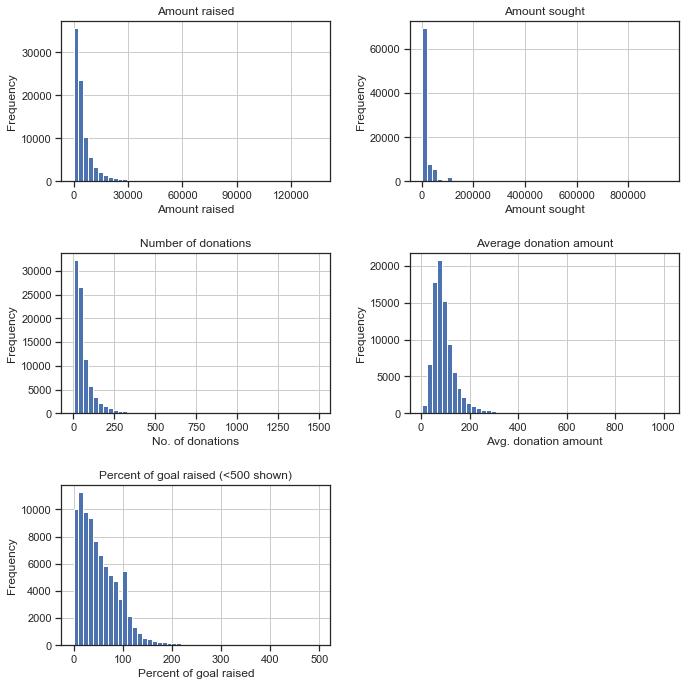

In [72]:
fig, axes = plt.subplots(3, 2, figsize=(10,10))

for row in axes:
    for ax in row:
        #ax.grid(zorder=0)
        ax.set_axisbelow(True)

master['current_amount'].hist(bins=50, ax=axes[0,0])
axes[0,0].set_title('Amount raised')
axes[0,0].set_xlabel("Amount raised")
axes[0,0].set_ylabel("Frequency")
axes[0,0].set_xticks(np.arange(0, 140000, 30000))

master['goal_amount'].hist(bins=50, ax=axes[0,1])
axes[0,1].set_title('Amount sought')
axes[0,1].set_xlabel("Amount sought")
axes[0,1].set_ylabel("Frequency")

master['donation_count'].hist(bins=50, ax=axes[1,0])
axes[1,0].set_title('Number of donations')
axes[1,0].set_xlabel('No. of donations')
axes[1,0].set_ylabel("Frequency")

master['donation_mean'].hist(bins=50, ax=axes[1,1])
axes[1,1].set_title('Average donation amount')
axes[1,1].set_xlabel("Avg. donation amount")
axes[1,1].set_ylabel("Frequency")

master[master['per_raised']<500]['per_raised'].hist(bins=50, ax=axes[2,0])
axes[2,0].set_title('Percent of goal raised (<500 shown)')
axes[2,0].set_xlabel("Percent of goal raised")
axes[2,0].set_ylabel("Frequency")

fig.delaxes(axes[2,1])

fig.tight_layout(pad=2)

fig.savefig('../plots/00-finance_distributions.eps')

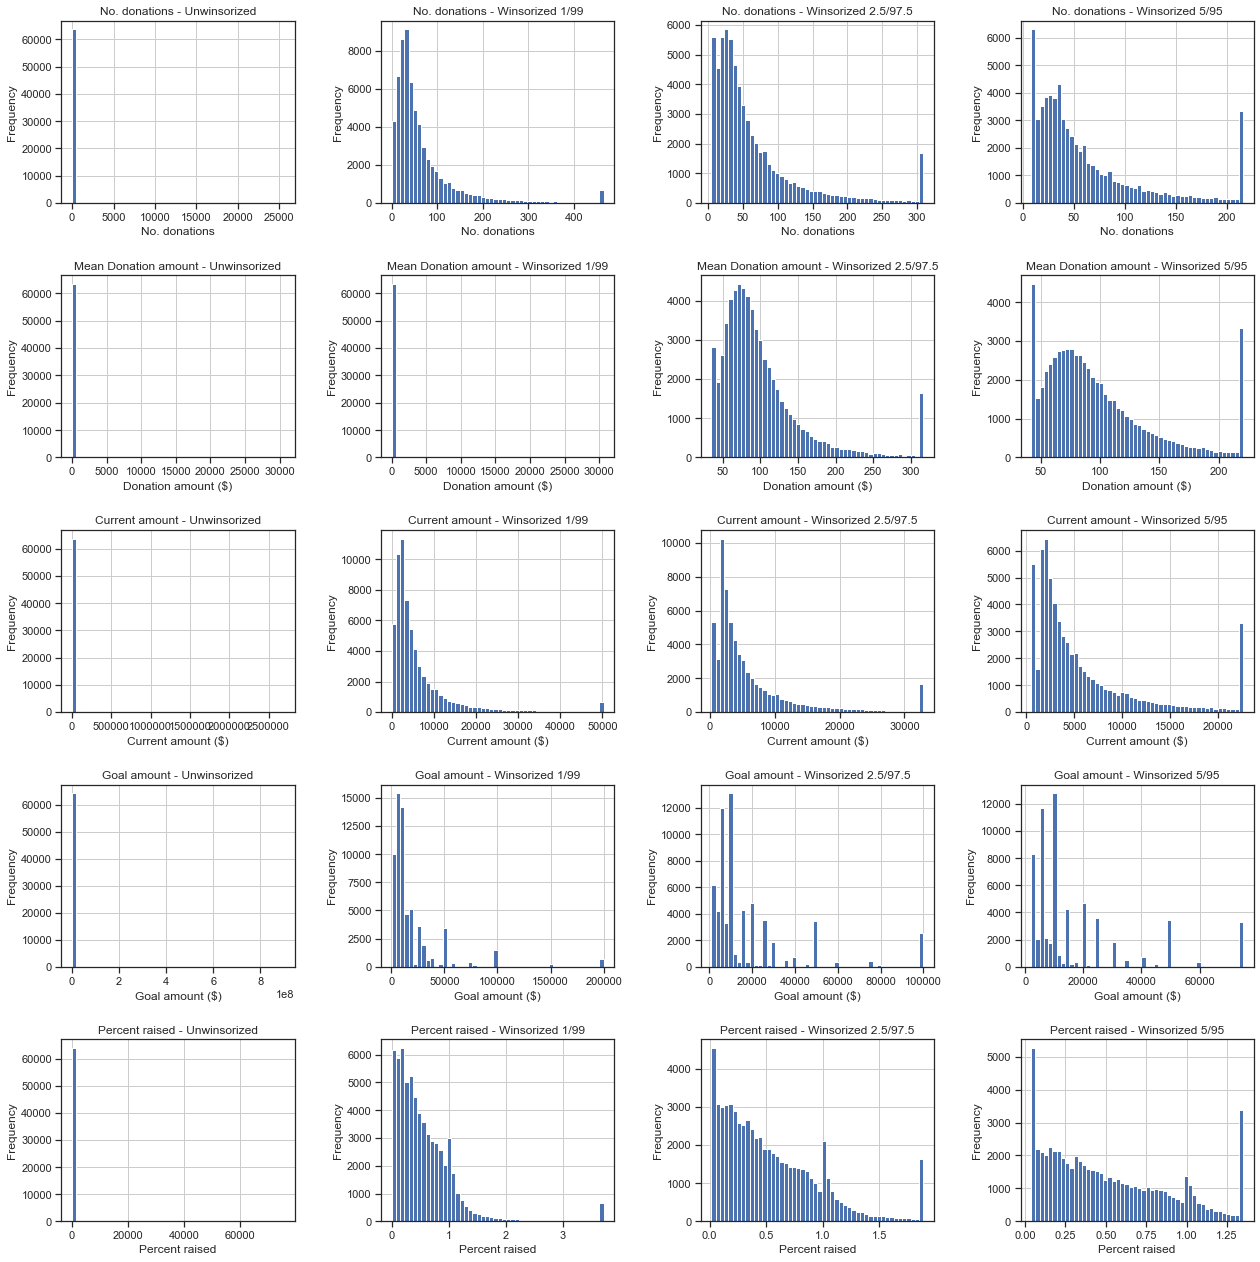

In [223]:
# fig, axes = plt.subplots(5, 4, figsize=(18,18))

# for row in axes:
#     for ax in row:
#         ax.grid(zorder=0)

# master['donation_count'].hist(bins=50, ax=axes[0,0])
# axes[0,0].set_title('No. donations - Unwinsorized')
# axes[0,0].set_xlabel("No. donations")
# axes[0,0].set_ylabel("Frequency")

# master['donation_count_winsor_1'].hist(bins=50, ax=axes[0,1])
# axes[0,1].set_title('No. donations - Winsorized 1/99')
# axes[0,1].set_xlabel("No. donations")
# axes[0,1].set_ylabel("Frequency")

# master['donation_count_winsor_25'].hist(bins=50, ax=axes[0,2])
# axes[0,2].set_title('No. donations - Winsorized 2.5/97.5')
# axes[0,2].set_xlabel("No. donations")
# axes[0,2].set_ylabel("Frequency")

# master['donation_count_winsor_5'].hist(bins=50, ax=axes[0,3])
# axes[0,3].set_title('No. donations - Winsorized 5/95')
# axes[0,3].set_xlabel("No. donations")
# axes[0,3].set_ylabel("Frequency")

# master['don_mean'].hist(bins=50, ax=axes[1,0])
# axes[1,0].set_title('Mean Donation amount - Unwinsorized')
# axes[1,0].set_xlabel("Donation amount ($)")
# axes[1,0].set_ylabel("Frequency")

# master['donation_amount_winsor_1'].hist(bins=50, ax=axes[1,1])
# axes[1,1].set_title('Mean Donation amount - Winsorized 1/99')
# axes[1,1].set_xlabel("Donation amount ($)")
# axes[1,1].set_ylabel("Frequency")

# master['donation_amount_winsor_25'].hist(bins=50, ax=axes[1,2])
# axes[1,2].set_title('Mean Donation amount - Winsorized 2.5/97.5')
# axes[1,2].set_xlabel("Donation amount ($)")
# axes[1,2].set_ylabel("Frequency")

# master['donation_amount_winsor_5'].hist(bins=50, ax=axes[1,3])
# axes[1,3].set_title('Mean Donation amount - Winsorized 5/95')
# axes[1,3].set_xlabel("Donation amount ($)")
# axes[1,3].set_ylabel("Frequency")

# master['current_amount'].hist(bins=50, ax=axes[2,0])
# axes[2,0].set_title('Current amount - Unwinsorized')
# axes[2,0].set_xlabel("Current amount ($)")
# axes[2,0].set_ylabel("Frequency")

# master['current_amount_winsor_1'].hist(bins=50, ax=axes[2,1])
# axes[2,1].set_title('Current amount - Winsorized 1/99')
# axes[2,1].set_xlabel("Current amount ($)")
# axes[2,1].set_ylabel("Frequency")

# master['current_amount_winsor_25'].hist(bins=50, ax=axes[2,2])
# axes[2,2].set_title('Current amount - Winsorized 2.5/97.5')
# axes[2,2].set_xlabel("Current amount ($)")
# axes[2,2].set_ylabel("Frequency")

# master['current_amount_winsor_5'].hist(bins=50, ax=axes[2,3])
# axes[2,3].set_title('Current amount - Winsorized 5/95')
# axes[2,3].set_xlabel("Current amount ($)")
# axes[2,3].set_ylabel("Frequency")

# master['goal_amount'].hist(bins=50, ax=axes[3,0])
# axes[3,0].set_title('Goal amount - Unwinsorized')
# axes[3,0].set_xlabel("Goal amount ($)")
# axes[3,0].set_ylabel("Frequency")

# master['goal_amount_winsor_1'].hist(bins=50, ax=axes[3,1])
# axes[3,1].set_title('Goal amount - Winsorized 1/99')
# axes[3,1].set_xlabel("Goal amount ($)")
# axes[3,1].set_ylabel("Frequency")

# master['goal_amount_winsor_25'].hist(bins=50, ax=axes[3,2])
# axes[3,2].set_title('Goal amount - Winsorized 2.5/97.5')
# axes[3,2].set_xlabel("Goal amount ($)")
# axes[3,2].set_ylabel("Frequency")

# master['goal_amount_winsor_5'].hist(bins=50, ax=axes[3,3])
# axes[3,3].set_title('Goal amount - Winsorized 5/95')
# axes[3,3].set_xlabel("Goal amount ($)")
# axes[3,3].set_ylabel("Frequency")

# master['per_raised'].hist(bins=50, ax=axes[4,0])
# axes[4,0].set_title('Percent raised - Unwinsorized')
# axes[4,0].set_xlabel("Percent raised")
# axes[4,0].set_ylabel("Frequency")

# master['per_raised_winsor_1'].hist(bins=50, ax=axes[4,1])
# axes[4,1].set_title('Percent raised - Winsorized 1/99')
# axes[4,1].set_xlabel("Percent raised")
# axes[4,1].set_ylabel("Frequency")

# master['per_raised_winsor_25'].hist(bins=50, ax=axes[4,2])
# axes[4,2].set_title('Percent raised - Winsorized 2.5/97.5')
# axes[4,2].set_xlabel("Percent raised")
# axes[4,2].set_ylabel("Frequency")

# master['per_raised_winsor_5'].hist(bins=50, ax=axes[4,3])
# axes[4,3].set_title('Percent raised - Winsorized 5/95')
# axes[4,3].set_xlabel("Percent raised")
# axes[4,3].set_ylabel("Frequency")


# fig.tight_layout(pad=2)

# fig.savefig('../plots/finance_distributions.eps')

### Figure 3

In [106]:
master['ndi_quantile'] = master['ndi_quantile'].replace({1.0:'1 (Least deprived)',2.0:'2',3.0:'3',4.0:'4 (Most deprived)'})

In [116]:
master['ndi_quantile'] = master['ndi_quantile'].replace({'1 (Least deprived)':'1 \n (Least deprived)'})
master['ndi_quantile'] = master['ndi_quantile'].replace({'4 (Most deprived)':'4 \n (Most deprived)'})

In [322]:
order = ['Northeast','West','Midwest','South']


fig, axes = plt.subplots(1, 2, figsize=(12,5))

# for row in axes:
#     for ax in row:
#         ax.grid(zorder=0)


color = sns.color_palette()[7]

sns.set(style="ticks")
sns.barplot(data=master, x='census_region', y='current_amount', order=order, 
                                                                ax=axes[0], 
                                                                capsize=0.3, 
                                                                errwidth=2, color=color, edgecolor=".2")
axes[0].set_xticklabels(axes[0].get_xticklabels(), size=14)
axes[0].set_yticklabels(axes[0].get_yticklabels(), size=14)
axes[0].set_xlabel('')
axes[0].set_ylabel('Amount raised ($)', size=14)
axes[0].yaxis.grid(True)
axes[0].yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

axes[0].text(0, 8100, 'a', horizontalalignment='center', fontsize=14)
axes[0].text(1, 7400, 'b', horizontalalignment='center', fontsize=14)
axes[0].text(2, 6500, 'c', horizontalalignment='center', fontsize=14)
axes[0].text(3, 6000, 'd', horizontalalignment='center', fontsize=14)

sns.despine()

color = sns.color_palette()[9]

import textwrap

order = ['1 \n (Least deprived)','2','3','4 \n (Most deprived)']

sns.set(style="ticks")
sns.barplot(data=master, x='ndi_quantile', y='current_amount', ax=axes[1], 
                                                            capsize=0.3, 
                                                            errwidth=2, color=color, edgecolor=".2", order=order)
axes[1].set_xticklabels(axes[1].get_xticklabels(), size=14)
axes[1].set_yticklabels(axes[1].get_yticklabels(), size=14)
axes[1].set_xlabel('')
axes[1].set_ylabel('Amount raised ($)', size=14)
axes[1].yaxis.grid(True)
axes[1].yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
#axes[1].set_xticklabels(textwrap.fill(x.get_text(), 5) for x in axes[1].get_xticklabels())

axes[1].text(0, 7300, 'a', horizontalalignment='center', fontsize=14)
axes[1].text(1, 6000, 'b', horizontalalignment='center', fontsize=14)
axes[1].text(2, 5300, 'c', horizontalalignment='center', fontsize=14)
axes[1].text(3, 4800, 'd', horizontalalignment='center', fontsize=14)

sns.despine()

fig.tight_layout(pad=3)

#fig.savefig('../plots/figure_3.eps')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


ValueError: Image size of 759x1052296 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 864x360 with 2 Axes>

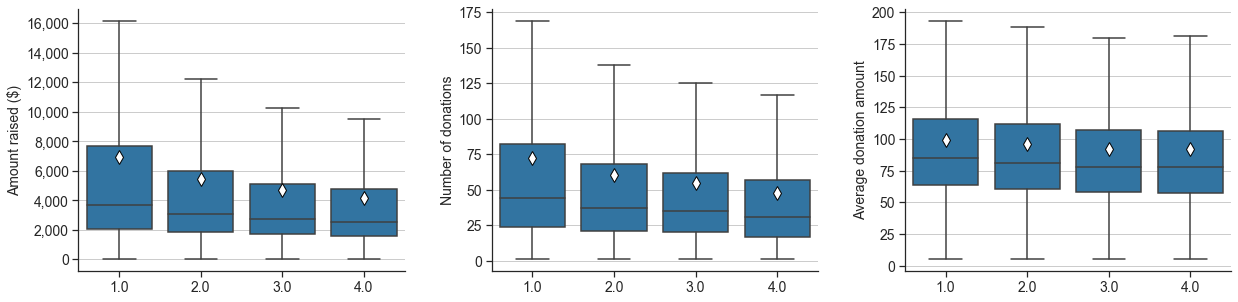

In [276]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

meanprops = {"marker":"d", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"}

sns.set_style('ticks')
sns.boxplot(data=master, x='ndi_quantile', y='current_amount', showfliers=False, showmeans=True, color=sns.color_palette("tab10")[0], meanprops=meanprops, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), size=14)
axes[0].set_yticklabels(axes[0].get_yticklabels(), size=14)
axes[0].set_xlabel('')
axes[0].set_ylabel('Amount raised ($)', size=14)
axes[0].yaxis.grid(True)
axes[0].yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
sns.despine()

sns.set_style('ticks')
sns.boxplot(data=master, x='ndi_quantile', y='donation_count', showfliers=False, showmeans=True, color=sns.color_palette("tab10")[0], meanprops=meanprops, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), size=14)
axes[1].set_yticklabels(axes[1].get_yticklabels(), size=14)
axes[1].set_xlabel('')
axes[1].set_ylabel('Number of donations', size=14)
axes[1].yaxis.grid(True)
axes[1].yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
sns.despine()


sns.set_style('ticks')
sns.boxplot(data=master, x='ndi_quantile', y='donation_mean', showfliers=False, showmeans=True, color=sns.color_palette("tab10")[0], meanprops=meanprops, ax=axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), size=14)
axes[2].set_yticklabels(axes[2].get_yticklabels(), size=14)
axes[2].set_xlabel('')
axes[2].set_ylabel('Average donation amount', size=14)
axes[2].yaxis.grid(True)
axes[2].yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
sns.despine()

fig.tight_layout(pad=3)

fig.savefig('../plots/00-FIGURE_2.eps')

AttributeError: 'numpy.ndarray' object has no attribute 'bar'

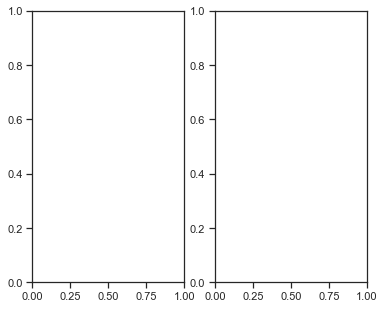

In [326]:

order = [1.0,2.0,3.0,4.0]

fig, ax = plt.subplots(1, 2, figsize=(6,5))
sns.set(style="ticks")
sns.barplot(data=master, x='ndi_quantile', y='current_amount', ax=ax, 
                                                            capsize=0.3, 
                                                            errwidth=2, color=color, edgecolor=".2", order=order)
ax.set_xticklabels(ax.get_xticklabels(), size=14)
ax.set_yticklabels(ax.get_yticklabels(), size=14)
ax.set_xlabel('')
ax.set_ylabel('Amount raised ($)', size=14)
ax.yaxis.grid(True)
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))


sns.despine()

fig.tight_layout(pad=3)


In [141]:
master[['current_amount','census_region']].groupby('census_region').agg('mean')

,current_amount
census_region,
Midwest,5853.631579
Northeast,7555.552708
South,5491.645775
West,6765.911141


In [142]:
master[['current_amount','ndi_quantile']].groupby('ndi_quantile').agg('mean')

,current_amount
ndi_quantile,
1 \n (Least deprived),6923.364639
2,5458.312017
3,4740.845603
4 \n (Most deprived),4180.617756


In [128]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [129]:
# Ordinary Least Squares (OLS) model
model = ols('current_amount ~ C(ndi_quantile)', data=master).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

rn = {'1 \n (Least deprived)':'1','4 \n (Most deprived)':'4'}

print(pairwise_tukeyhsd(master['current_amount'], master['ndi_quantile'].replace(rn)))

                       sum_sq       df           F         PR(>F)
C(ndi_quantile)  7.518284e+10      3.0  320.605555  4.742309e-207
Residual         6.835360e+12  87445.0         NaN            NaN
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
     1      2 -1465.0526  0.001 -1653.6223 -1276.4829   True
     1      3  -2182.519  0.001 -2433.5473 -1931.4908   True
     1      4 -2742.7469  0.001 -3124.0986 -2361.3952   True
     2      3  -717.4664  0.001  -999.4858  -435.4471   True
     2      4 -1277.6943  0.001  -1680.123  -875.2656   True
     3      4  -560.2278 0.0052  -995.4353  -125.0204   True
------------------------------------------------------------


In [130]:
# Ordinary Least Squares (OLS) model
model = ols('current_amount ~ C(census_region)', data=master).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


print(pairwise_tukeyhsd(master['current_amount'], master['census_region'].replace(rn)))

                        sum_sq       df           F         PR(>F)
C(census_region)  5.130334e+10      3.0  218.013513  6.519071e-141
Residual          6.859240e+12  87445.0         NaN            NaN
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------------
  Midwest Northeast  1701.9211 0.001  1443.7587  1960.0836   True
  Midwest     South  -361.9858 0.001  -574.4894  -149.4822   True
  Midwest      West   912.2796 0.001   685.4325  1139.1266   True
Northeast     South -2063.9069 0.001 -2294.7105 -1833.1033   True
Northeast      West  -789.6416 0.001 -1033.7156  -545.5675   True
    South      West  1274.2654 0.001  1079.1191  1469.4116   True
-----------------------------------------------------------------


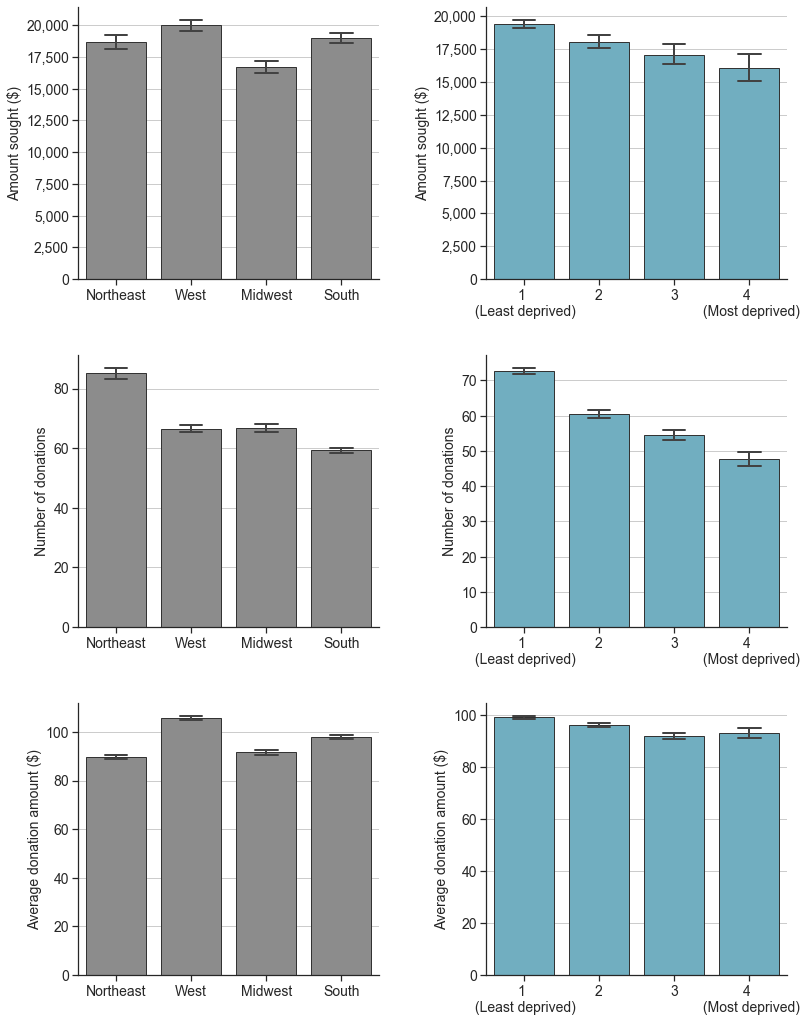

In [146]:
order = ['Northeast','West','Midwest','South']


fig, axes = plt.subplots(3, 2, figsize=(12,15))

# for row in axes:
#     for ax in row:
#         ax.grid(zorder=0)


color = sns.color_palette()[7]

sns.set(style="ticks")
sns.barplot(data=master, x='census_region', y='goal_amount', order=order, 
                                                                ax=axes[0,0], 
                                                                capsize=0.3, 
                                                                errwidth=2, color=color, edgecolor=".2")
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), size=14)
axes[0,0].set_yticklabels(axes[0,0].get_yticklabels(), size=14)
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Amount sought ($)', size=14)
axes[0,0].yaxis.grid(True)
axes[0,0].yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
sns.despine()

sns.set(style="ticks")
sns.barplot(data=master, x='census_region', y='donation_count', order=order, 
                                                                ax=axes[1,0], 
                                                                capsize=0.3, 
                                                                errwidth=2, color=color, edgecolor=".2")
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), size=14)
axes[1,0].set_yticklabels(axes[1,0].get_yticklabels(), size=14)
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('Number of donations', size=14)
axes[1,0].yaxis.grid(True)
axes[1,0].yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
sns.despine()

sns.set(style="ticks")
sns.barplot(data=master, x='census_region', y='donation_mean', order=order, 
                                                                ax=axes[2,0], 
                                                                capsize=0.3, 
                                                                errwidth=2, color=color, edgecolor=".2")
axes[2,0].set_xticklabels(axes[2,0].get_xticklabels(), size=14)
axes[2,0].set_yticklabels(axes[2,0].get_yticklabels(), size=14)
axes[2,0].set_xlabel('')
axes[2,0].set_ylabel('Average donation amount ($)', size=14)
axes[2,0].yaxis.grid(True)
axes[2,0].yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
sns.despine()





color = sns.color_palette()[9]
order = ['1 \n (Least deprived)','2','3','4 \n (Most deprived)']

sns.set(style="ticks")
sns.barplot(data=master, x='ndi_quantile', y='goal_amount', ax=axes[0,1], 
                                                            capsize=0.3, 
                                                            errwidth=2, color=color, edgecolor=".2", order=order)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), size=14)
axes[0,1].set_yticklabels(axes[0,1].get_yticklabels(), size=14)
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('Amount sought ($)', size=14)
axes[0,1].yaxis.grid(True)
axes[0,1].yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
#axes[1].set_xticklabels(textwrap.fill(x.get_text(), 5) for x in axes[1].get_xticklabels())

sns.set(style="ticks")
sns.barplot(data=master, x='ndi_quantile', y='donation_count', ax=axes[1,1], 
                                                            capsize=0.3, 
                                                            errwidth=2, color=color, edgecolor=".2", order=order)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), size=14)
axes[1,1].set_yticklabels(axes[1,1].get_yticklabels(), size=14)
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('Number of donations', size=14)
axes[1,1].yaxis.grid(True)
axes[1,1].yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
#axes[1].set_xticklabels(textwrap.fill(x.get_text(), 5) for x in axes[1].get_xticklabels())

sns.set(style="ticks")
sns.barplot(data=master, x='ndi_quantile', y='donation_mean', ax=axes[2,1], 
                                                            capsize=0.3, 
                                                            errwidth=2, color=color, edgecolor=".2", order=order)
axes[2,1].set_xticklabels(axes[2,1].get_xticklabels(), size=14)
axes[2,1].set_yticklabels(axes[2,1].get_yticklabels(), size=14)
axes[2,1].set_xlabel('')
axes[2,1].set_ylabel('Average donation amount ($)', size=14)
axes[2,1].yaxis.grid(True)
axes[2,1].yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
#axes[1].set_xticklabels(textwrap.fill(x.get_text(), 5) for x in axes[1].get_xticklabels())






sns.despine()

fig.tight_layout(pad=3)

fig.savefig('../plots/success_supp_geog.eps')

#### Finances by census region

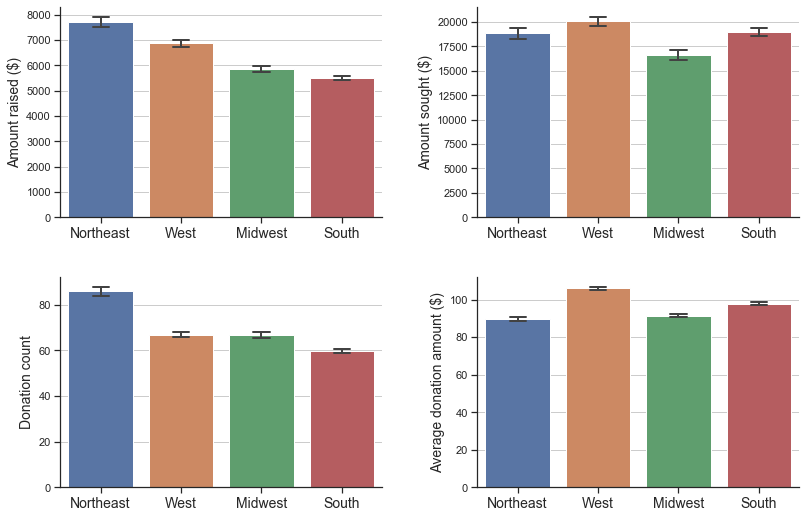

In [388]:
order = ['Northeast','West','Midwest','South']


fig, axes = plt.subplots(2, 2, figsize=(12,8))

for row in axes:
    for ax in row:
        ax.grid(zorder=0)

sns.set(style="ticks")
sns.barplot(data=master, x='census_region', y='current_amount', order=order, ax=axes[0,0], capsize=0.2, errwidth=2)
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), size=14)
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Amount raised ($)', size=14)
axes[0,0].yaxis.grid(True)
#axes[0,0].get_legend().remove()
sns.despine()

sns.set(style="ticks")
sns.barplot(data=master, x='census_region', y='goal_amount', order=order, ax=axes[0,1], capsize=0.2, errwidth=2)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), size=14)
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('Amount sought ($)', size=14)
axes[0,1].yaxis.grid(True)
#axes[0,1].get_legend().remove()
sns.despine()

sns.set(style="ticks")
sns.barplot(data=master, x='census_region', y='donation_count', order=order, ax=axes[1,0], capsize=0.2, errwidth=2)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), size=14)
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('Donation count', size=14)
axes[1,0].yaxis.grid(True)
#axes[1,0].get_legend().remove()
sns.despine()

sns.set(style="ticks")
sns.barplot(data=master, x='census_region', y='donation_mean', order=order, ax=axes[1,1], capsize=0.2, errwidth=2)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), size=14)
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('Average donation amount ($)', size=14)
axes[1,1].yaxis.grid(True)
#axes[1,1].get_legend().remove()
sns.despine()


# sns.set(style="ticks")
# sns.pointplot(data=master, x='census_region', y='per_raised_winsor_25', join=False, capsize=0.15, order=order, ax=axes[2,0], scale=1, errwidth=2, hue='census_region')
# axes[2,0].set_xticklabels(axes[2,0].get_xticklabels(), size=14)
# axes[2,0].set_xlabel('')
# axes[2,0].set_ylabel('Percent of goal raised (%)', size=14)
# axes[2,0].yaxis.grid(True)
# axes[2,0].get_legend().remove()
# sns.despine()

# northeast = ['Northeast' for x in range(0,20)]
# midwest = ['Midwest' for x in range(0,17)]
# south = ['South' for x in range (0,14)]
# west = ['West' for x in range(0,16)]

# together = northeast + midwest + south + west

# hit_goal = pd.DataFrame({'census_region':together})

# pal = []
# pal.append(sns.color_palette()[0])
# pal.append(sns.color_palette()[2])
# pal.append(sns.color_palette()[3])
# pal.append(sns.color_palette()[1])


# sns.set(style="ticks")
# sns.countplot(data=hit_goal, x='census_region', order=order, ax=axes[2,1], palette=pal)
# axes[2,1].set_xticklabels(axes[1,1].get_xticklabels(), size=14)
# axes[2,1].set_xlabel('')
# axes[2,1].set_ylabel('Reached fundraising goal (%)', size=14)
# axes[2,1].yaxis.grid(True, zorder=0)
# #axes[2,1].get_legend().remove()
# sns.despine()

fig.tight_layout(pad=3)

fig.savefig('../plots/figure_3_no_cdi.eps')


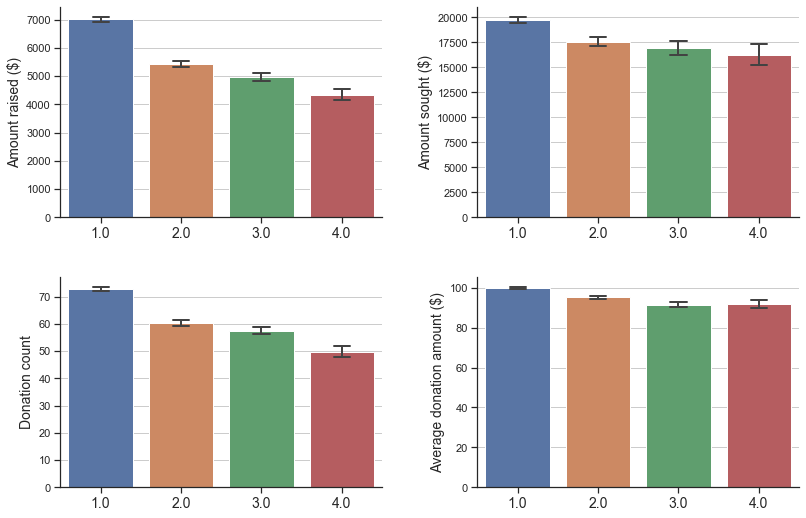

In [389]:
#order = ['Northeast','West','Midwest','South']


fig, axes = plt.subplots(2, 2, figsize=(12,8))

for row in axes:
    for ax in row:
        ax.grid(zorder=0)

sns.set(style="ticks")
sns.barplot(data=master, x='ndi_quantile', y='current_amount', ax=axes[0,0], capsize=0.2, errwidth=2)
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), size=14)
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Amount raised ($)', size=14)
axes[0,0].yaxis.grid(True)
#axes[0,0].get_legend().remove()
sns.despine()

sns.set(style="ticks")
sns.barplot(data=master, x='ndi_quantile', y='goal_amount', ax=axes[0,1], capsize=0.2, errwidth=2)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), size=14)
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('Amount sought ($)', size=14)
axes[0,1].yaxis.grid(True)
#axes[0,1].get_legend().remove()
sns.despine()

sns.set(style="ticks")
sns.barplot(data=master, x='ndi_quantile', y='donation_count', ax=axes[1,0], capsize=0.2, errwidth=2)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), size=14)
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('Donation count', size=14)
axes[1,0].yaxis.grid(True)
#axes[1,0].get_legend().remove()
sns.despine()

sns.set(style="ticks")
sns.barplot(data=master, x='ndi_quantile', y='donation_mean', ax=axes[1,1], capsize=0.2, errwidth=2)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), size=14)
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('Average donation amount ($)', size=14)
axes[1,1].yaxis.grid(True)
#axes[1,1].get_legend().remove()
sns.despine()


# sns.set(style="ticks")
# sns.pointplot(data=master, x='census_region', y='per_raised_winsor_25', join=False, capsize=0.15, order=order, ax=axes[2,0], scale=1, errwidth=2, hue='census_region')
# axes[2,0].set_xticklabels(axes[2,0].get_xticklabels(), size=14)
# axes[2,0].set_xlabel('')
# axes[2,0].set_ylabel('Percent of goal raised (%)', size=14)
# axes[2,0].yaxis.grid(True)
# axes[2,0].get_legend().remove()
# sns.despine()

# northeast = ['Northeast' for x in range(0,20)]
# midwest = ['Midwest' for x in range(0,17)]
# south = ['South' for x in range (0,14)]
# west = ['West' for x in range(0,16)]

# together = northeast + midwest + south + west

# hit_goal = pd.DataFrame({'census_region':together})

# pal = []
# pal.append(sns.color_palette()[0])
# pal.append(sns.color_palette()[2])
# pal.append(sns.color_palette()[3])
# pal.append(sns.color_palette()[1])


# sns.set(style="ticks")
# sns.countplot(data=hit_goal, x='census_region', order=order, ax=axes[2,1], palette=pal)
# axes[2,1].set_xticklabels(axes[1,1].get_xticklabels(), size=14)
# axes[2,1].set_xlabel('')
# axes[2,1].set_ylabel('Reached fundraising goal (%)', size=14)
# axes[2,1].yaxis.grid(True, zorder=0)
# #axes[2,1].get_legend().remove()
# sns.despine()

fig.tight_layout(pad=3)

fig.savefig('../plots/figure_3_by_cdi.eps')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


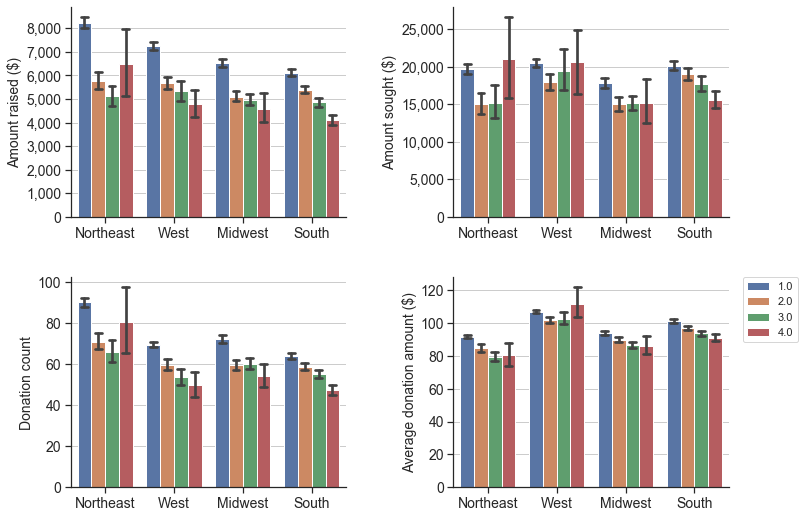

In [378]:




order = ['Northeast','West','Midwest','South']

import matplotlib

fig, axes = plt.subplots(2, 2, figsize=(12,8))


for row in axes:
    for ax in row:
        ax.grid(zorder=0)

sns.set(style="ticks")
sns.barplot(data=master, x='census_region', y='current_amount',order=order, ax=axes[0,0],hue='ndi_quantile', capsize=0.1)
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), size=14)
axes[0,0].set_yticklabels(axes[0,0].get_yticks().astype(int), size=14)
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Amount raised ($)', size=14)
axes[0,0].yaxis.grid(True)
axes[0,0].get_legend().remove()
axes[0,0].yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
sns.despine()

sns.set(style="ticks")
sns.barplot(data=master, x='census_region', y='goal_amount', order=order, ax=axes[0,1],hue='ndi_quantile', capsize=0.1)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), size=14)
axes[0,1].set_yticklabels(axes[0,1].get_yticks().astype(int), size=14)
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('Amount sought ($)', size=14)
axes[0,1].yaxis.grid(True)
axes[0,1].get_legend().remove()
axes[0,1].yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
sns.despine()

sns.set(style="ticks")
sns.barplot(data=master, x='census_region', y='donation_count', order=order, ax=axes[1,0], hue='ndi_quantile', capsize=0.1)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), size=14)
axes[1,0].set_yticklabels(axes[1,0].get_yticks().astype(int), size=14)
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('Donation count', size=14)
axes[1,0].yaxis.grid(True)
axes[1,0].get_legend().remove()
sns.despine()

sns.set(style="ticks")
sns.barplot(data=master, x='census_region', y='donation_mean', order=order, ax=axes[1,1], hue='ndi_quantile', capsize=0.1)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), size=14)
axes[1,1].set_yticklabels(axes[1,1].get_yticks().astype(int), size=14)
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('Average donation amount ($)', size=14)
axes[1,1].yaxis.grid(True)
#axes[1,1].get_legend().remove()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()


fig.tight_layout(pad=3)

fig.savefig('../plots/figure_3_with_cdi.eps')



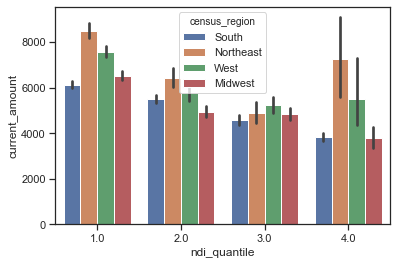

In [72]:
sns.barplot(x='ndi_quantile',y='current_amount',data=master,hue='census_region')

In [181]:
master[(master['ndi_quantile'] == 4)&(master['census_region'] == 'Northeast')]['county_name'].value_counts()

Bronx County, New York    117
Somerset County, Maine      9
Name: county_name, dtype: int64

In [129]:
master[(master['ndi_quantile'] == 4)&(master['census_region'] == 'West')]['county_name'].value_counts()

Tulare County, California            82
Doña Ana County, New Mexico          51
Yuma County, Arizona                 39
San Juan County, New Mexico          29
Imperial County, California          27
Roosevelt County, New Mexico         24
Tehama County, California            20
Apache County, Arizona               16
Taos County, New Mexico              15
Lincoln County, Montana              13
Otero County, New Mexico             12
Chaves County, New Mexico            11
Torrance County, New Mexico          10
McKinley County, New Mexico           9
Navajo County, Arizona                8
Alamosa County, Colorado              8
Malheur County, Oregon                7
San Miguel County, New Mexico         6
Modoc County, California              6
La Paz County, Arizona                5
Rio Arriba County, New Mexico         5
Rio Grande County, Colorado           5
Hidalgo County, New Mexico            4
Colfax County, New Mexico             4
Santa Cruz County, Arizona            4


In [61]:
pd.crosstab(master['ndi_quantile'],master['census_region'])

census_region,Midwest,Northeast,South,West
ndi_quantile,,,,
1.0,11058,10921,15642,17809
2.0,4307,2326,9665,4237
3.0,2407,779,5106,1344
4.0,331,131,3090,484


In [224]:
master[['goal_amount_winsor_25',
        'current_amount_winsor_25',
        'per_raised_winsor_25',
        'donation_count_winsor_25',
        'donation_amount_winsor_25',
        'census_region']].groupby(['census_region']).mean().T.round(3)

census_region,Midwest,Northeast,South,West
goal_amount_winsor_25,16201.145,18743.923,18046.915,19653.003
current_amount_winsor_25,5858.042,7441.853,5522.943,6729.798
per_raised_winsor_25,0.554,0.601,0.496,0.534
donation_count_winsor_25,64.712,81.728,57.514,64.678
donation_amount_winsor_25,94.972,92.943,101.550,109.148


In [225]:
fin_by_reg = master[['goal_amount_winsor_25',
        'current_amount_winsor_25',
        'per_raised_winsor_25',
        'donation_count_winsor_25',
        'donation_amount_winsor_25',
        'census_region']].groupby(['census_region']).agg(['mean','count','std'])

import math

ci95_hi = []
ci95_lo = []

for i in fin_by_reg.index:
    m, c, s = fin_by_reg.loc[i][0:3]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))
    
fin_by_reg['goal_amount_winsor_25','ci95_hi'] = ci95_hi
fin_by_reg['goal_amount_winsor_25','ci95_lo'] = ci95_lo

ci95_hi = []
ci95_lo = []

for i in fin_by_reg.index:
    m, c, s = fin_by_reg.loc[i][3:6]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

fin_by_reg['current_amount_winsor_25','ci95_hi'] = ci95_hi
fin_by_reg['current_amount_winsor_25','ci95_lo'] = ci95_lo

ci95_hi = []
ci95_lo = []

for i in fin_by_reg.index:
    m, c, s = fin_by_reg.loc[i][6:9]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

fin_by_reg['per_raised_winsor_25','ci95_hi'] = ci95_hi
fin_by_reg['per_raised_winsor_25','ci95_lo'] = ci95_lo

ci95_hi = []
ci95_lo = []

for i in fin_by_reg.index:
    m, c, s = fin_by_reg.loc[i][9:12]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

fin_by_reg['donation_count_winsor_25','ci95_hi'] = ci95_hi
fin_by_reg['donation_count_winsor_25','ci95_lo'] = ci95_lo

ci95_hi = []
ci95_lo = []

for i in fin_by_reg.index:
    m, c, s = fin_by_reg.loc[i][12:15]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

fin_by_reg['donation_amount_winsor_25','ci95_hi'] = ci95_hi
fin_by_reg['donation_amount_winsor_25','ci95_lo'] = ci95_lo


In [231]:
fin_by_reg_ref = fin_by_reg.T.reset_index().sort_values('level_0')

In [236]:
fin_by_reg_ref_mean = fin_by_reg_ref[fin_by_reg_ref['level_1'] == 'mean']
fin_by_reg_ref_mean.index=fin_by_reg_ref_mean['level_0']
del fin_by_reg_ref_mean['level_0']
del fin_by_reg_ref_mean['level_1']

fin_by_reg_ref_cilo = fin_by_reg_ref[fin_by_reg_ref['level_1'] == 'ci95_lo']
fin_by_reg_ref_cilo.index=fin_by_reg_ref_cilo['level_0']
del fin_by_reg_ref_cilo['level_0']
del fin_by_reg_ref_cilo['level_1']

fin_by_reg_ref_cihi = fin_by_reg_ref[fin_by_reg_ref['level_1'] == 'ci95_hi']
fin_by_reg_ref_cihi.index=fin_by_reg_ref_cihi['level_0']
del fin_by_reg_ref_cihi['level_0']
del fin_by_reg_ref_cihi['level_1']

In [243]:
fin_by_reg_ref_mean.round(2).astype(str).add(' (').add(fin_by_reg_ref_cilo.round(2).astype(str)).add(' - ').add(fin_by_reg_ref_cihi.round(2).astype(str)).add(')')

census_region,Midwest,Northeast,South,West
level_0,,,,
current_amount_winsor_25,5858.04 (5747.75 - 5968.33),7441.85 (7286.61 - 7597.1),5522.94 (5441.89 - 5603.99),6729.8 (6617.77 - 6841.83)
donation_amount_winsor_25,94.97 (94.06 - 95.88),92.94 (91.95 - 93.93),101.55 (100.81 - 102.29),109.15 (108.25 - 110.05)
donation_count_winsor_25,64.71 (63.63 - 65.8),81.73 (80.24 - 83.21),57.51 (56.75 - 58.28),64.68 (63.69 - 65.67)
goal_amount_winsor_25,16201.14 (15859.59 - 16542.7),18743.92 (18305.01 - 19182.84),18046.92 (17761.51 - 18332.32),19653.0 (19303.82 - 20002.18)
per_raised_winsor_25,0.55 (0.55 - 0.56),0.6 (0.59 - 0.61),0.5 (0.49 - 0.5),0.53 (0.53 - 0.54)


Hit goal by census region

In [274]:
hit_goal_df = pd.crosstab(master['hit_goal'],master['census_region']).T

In [275]:
hit_goal_df.columns.name = ''

In [276]:
hit_goal_df['sum'] = hit_goal_df.apply(lambda x: x.sum(), axis=1)
hit_goal_df['per'] = hit_goal_df[1]/hit_goal_df['sum']
hit_goal_df['together'] = hit_goal_df['sum'].round(1).astype(str).add(' (').add(hit_goal_df['per'].round(2).astype(str)).add(')')
hit_goal_df

,0,1,sum,per,together
census_region,,,,,
Midwest,11283,2162,13445,0.160803,13445 (0.16)
Northeast,8325,1965,10290,0.190962,10290 (0.19)
South,20500,3082,23582,0.130693,23582 (0.13)
West,14345,2554,16899,0.151133,16899 (0.15)


Normalized distribution of campaign year by census region

In [309]:
cen_year = pd.crosstab(master['year'], master['census_region']).apply(lambda r: r/r.sum(), axis=1).round(4) * 100

In [310]:
cen_year = cen_year.reset_index().melt(id_vars=['year'])

In [315]:
rn = {
    1.0:'1 (Least deprived)',
    2.0:'2',
    3.0:'3',
    4.0:'4 (Most deprived)'
}

In [316]:
cen_ndi = pd.crosstab(master['year'], master['ndi_quantile'].replace(rn)).apply(lambda r: r/r.sum(), axis=1).round(4) * 100

In [318]:
cen_ndi = cen_ndi.reset_index().melt(id_vars=['year'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


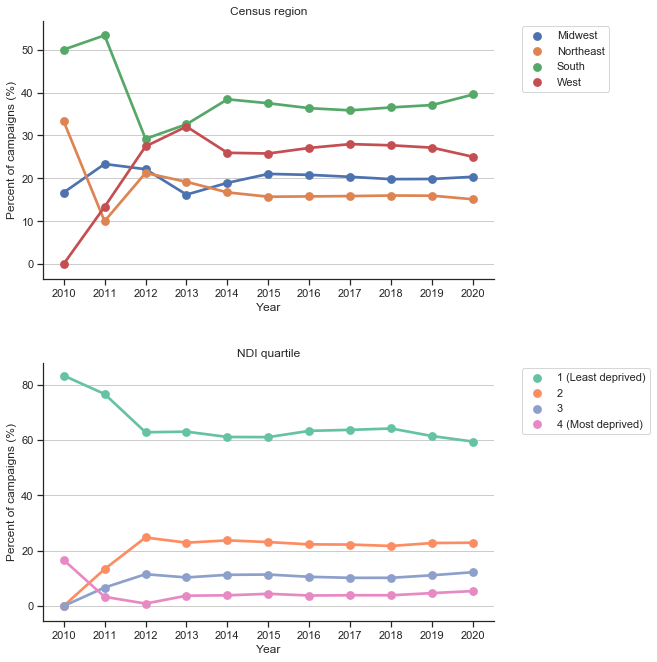

In [325]:
# sns.pointplot(x='year',y='value',hue='census_region',data=cont)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.xlabel('Year')
# plt.ylabel('Percent of campaigns (%)')
# sns.despine()
# plt.savefig("../plots/census_by_year.eps", bbox_inches='tight')



fig, axes = plt.subplots(2,1,figsize=(10,10))

sns.pointplot(x='year', y='value', hue='census_region', data=cen_year, join=True, scale=1, ax=axes[0])
axes[0].set_ylabel('Percent of campaigns (%)')
axes[0].set_xlabel('Year')
axes[0].yaxis.grid(True)
sns.despine()
axes[0].legend(bbox_to_anchor=(1.05, 1), loc=2)
axes[0].set_title('Census region')

sns.pointplot(x='year', y='value', hue='ndi_quantile', data=cen_ndi, join=True, scale=1, ax=axes[1], palette=sns.color_palette("Set2"))
axes[1].set_ylabel('Percent of campaigns (%)')
axes[1].set_xlabel('Year')
axes[1].yaxis.grid(True)
sns.despine()
axes[1].legend(bbox_to_anchor=(1.05, 1), loc=2)
axes[1].set_title('NDI quartile')

fig.tight_layout(pad=3)

plt.savefig("../plots/geog_by_year.eps", bbox_inches='tight')

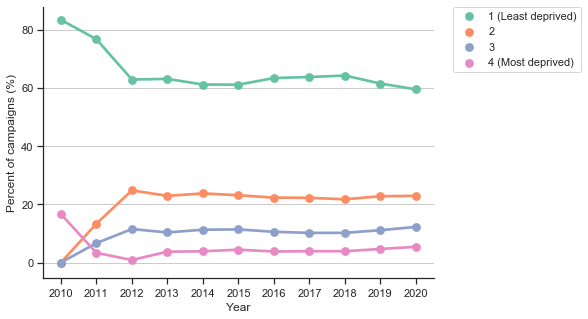

In [320]:
# sns.pointplot(x='year',y='value',hue='census_region',data=cont)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.xlabel('Year')
# plt.ylabel('Percent of campaigns (%)')
# sns.despine()
# plt.savefig("../plots/census_by_year.eps", bbox_inches='tight')



fig, ax = plt.subplots(figsize=(7,5))


#plt.savefig("../plots/census_by_year.eps", bbox_inches='tight')

Distribution of amount raised by year

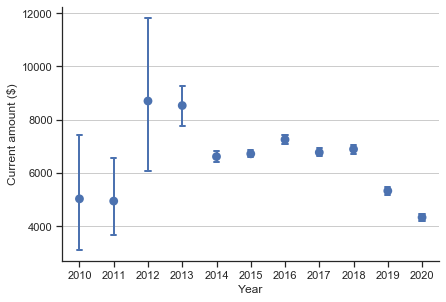

In [211]:
fig, ax = plt.subplots(figsize=(7,5))
sns.pointplot(x='year', y='current_amount', data=master, join=False, capsize=0.15, scale=1, errwidth=2, ax=ax)
ax.set_ylabel('Current amount ($)')
ax.set_xlabel('Year')
ax.yaxis.grid(True)
sns.despine()
fig.tight_layout(pad=3)
fig.savefig('../plots/current_amt_by_year.eps')

# Statistics

### Other tests

In [139]:
from scipy.stats import chi2_contingency

cont = pd.crosstab(master['hit_goal'], master['census_region'])

g, p, dof, expctd = chi2_contingency(cont)

g,p

(196.96220907741292, 1.9121398559149487e-42)

In [142]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('goal_amount_winsor_25 ~ C(census_region)', data=master).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table['PR(>F)'])

# Ordinary Least Squares (OLS) model
model = ols('current_amount_winsor_25 ~ C(census_region)', data=master).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table['PR(>F)'])

# Ordinary Least Squares (OLS) model
model = ols('donation_count_winsor_25 ~ C(census_region)', data=master).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table['PR(>F)'])

# Ordinary Least Squares (OLS) model
model = ols('donation_amount_winsor_25 ~ C(census_region)', data=master).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table['PR(>F)'])

# Ordinary Least Squares (OLS) model
model = ols('per_raised_winsor_25 ~ C(census_region)', data=master).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table['PR(>F)'])

C(census_region)    1.891025e-38
Residual                     NaN
Name: PR(>F), dtype: float64
C(census_region)    1.767827e-133
Residual                      NaN
Name: PR(>F), dtype: float64
C(census_region)    1.140591e-193
Residual                      NaN
Name: PR(>F), dtype: float64
C(census_region)    1.588785e-141
Residual                      NaN
Name: PR(>F), dtype: float64
C(census_region)    9.965086e-91
Residual                     NaN
Name: PR(>F), dtype: float64


### Regressions

#### Donation amount

In [33]:
# formula = '''donation_mean ~  
# C(year) + 
# C(census_region) + 
# goal_amount + 
# C(d_cardiovascular_diseases) + 
# C(d_endocrine_diseases) + 
# C(d_gastrointestinal_diseases) + 
# C(d_genitourinary_diseases) + 
# C(d_infections) + 
# C(d_injuries_and_external_causes) + 
# C(d_mental_behavioral_and_substance_use_disorders) + 
# C(d_musculoskeletal_diseases) + 
# C(d_neoplasms) + 
# C(d_nervous_system_diseases) + 
# C(d_respiratory_diseases) +
# has_internet +
# no_health_insurance +
# unemployment_rate +
# percent_poverty
# '''.replace('\n','')

In [186]:
formula = '''donation_mean ~  
C(year) + 
C(census_region) + 
goal_amount + 
C(d_cardiovascular_diseases) + 
C(d_endocrine_diseases) + 
C(d_gastrointestinal_diseases) + 
C(d_genitourinary_diseases) + 
C(d_infections) + 
C(d_injuries_and_external_causes) + 
C(d_mental_behavioral_and_substance_use_disorders) + 
C(d_musculoskeletal_diseases) + 
C(d_neoplasms) + 
C(d_nervous_system_diseases) + 
C(d_respiratory_diseases) +
C(ndi_quantile)
'''.replace('\n','')

In [187]:
formula

'donation_mean ~  C(year) + C(census_region) + goal_amount + C(d_cardiovascular_diseases) + C(d_endocrine_diseases) + C(d_gastrointestinal_diseases) + C(d_genitourinary_diseases) + C(d_infections) + C(d_injuries_and_external_causes) + C(d_mental_behavioral_and_substance_use_disorders) + C(d_musculoskeletal_diseases) + C(d_neoplasms) + C(d_nervous_system_diseases) + C(d_respiratory_diseases) +C(ndi_quantile)'

In [188]:
gamma_model = sm.GLM.from_formula(formula=formula, data=master, family=sm.families.Gamma(sm.families.links.log()))

In [189]:
gamma_results = gamma_model.fit()

In [190]:
print(gamma_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          donation_mean   No. Observations:                87468
Model:                            GLM   Df Residuals:                    87439
Model Family:                   Gamma   Df Model:                           28
Link Function:                    log   Scale:                         0.39407
Method:                          IRLS   Log-Likelihood:            -4.5973e+05
Date:                Tue, 16 Mar 2021   Deviance:                       22843.
Time:                        11:50:56   Pearson chi2:                 3.45e+04
No. Iterations:                    25                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [215]:
gam_html = gamma_results.summary().as_html()

In [217]:
gam_df = pd.read_html(gam_html, header=0)[1]

In [218]:
gam_df.head()

,Unnamed: 0,coef,std err,z,P>|z|,[0.025,0.975]
0,Intercept,4.0912,0.676,6.056,0.000,2.767,5.415
1,C(year)[T.2011],0.3644,0.740,0.492,0.622,-1.086,1.814
2,C(year)[T.2012],0.5348,0.693,0.772,0.440,-0.823,1.893
3,C(year)[T.2013],0.5206,0.678,0.768,0.442,-0.807,1.849
4,C(year)[T.2014],0.4938,0.676,0.731,0.465,-0.831,1.818


In [219]:
def AddBeta(df):
    beta = df['coef'].round(2).astype(str) + ' (' + df['std err'].round(2).astype(str) + ')'
    return beta

def AddPer(df):
    exp_coef = np.exp(df['coef'])
    exp_low = np.exp(df['[0.025'])
    exp_high = np.exp(df['0.975]'])
    
    r = exp_coef.round(2).astype(str) + ' (' + exp_low.round(2).astype(str) + ', ' + exp_high.round(2).astype(str) + ')'
    
    return r

In [221]:
AddBeta(gam_df)

0      4.09 (0.68)
1      0.36 (0.74)
2      0.53 (0.69)
3      0.52 (0.68)
4      0.49 (0.68)
5      0.41 (0.68)
6      0.45 (0.68)
7      0.53 (0.68)
8       0.5 (0.68)
9      0.35 (0.68)
10     0.22 (0.68)
11      0.0 (0.02)
12      0.1 (0.02)
13     0.16 (0.02)
14     0.04 (0.02)
15     0.02 (0.03)
16     0.07 (0.03)
17    -0.01 (0.03)
18     0.03 (0.02)
19    -0.02 (0.02)
20     0.03 (0.03)
21      0.0 (0.03)
22     0.06 (0.01)
23     0.04 (0.02)
24     0.05 (0.03)
25    -0.03 (0.01)
26    -0.08 (0.02)
27     -0.1 (0.03)
28       0.0 (0.0)
dtype: object

#### Donation count

In [191]:
formula = '''donation_count ~  
C(year) + 
C(census_region) + 
goal_amount + 
C(d_cardiovascular_diseases) + 
C(d_endocrine_diseases) + 
C(d_gastrointestinal_diseases) + 
C(d_genitourinary_diseases) + 
C(d_infections) + 
C(d_injuries_and_external_causes) + 
C(d_mental_behavioral_and_substance_use_disorders) + 
C(d_musculoskeletal_diseases) + 
C(d_neoplasms) + 
C(d_nervous_system_diseases) + 
C(d_respiratory_diseases) +
ndi_quantile
'''.replace('\n','')

In [192]:
pois_model = sm.GLM.from_formula(formula=formula, data=master, family=sm.families.Poisson())

In [193]:
pois_results = pois_model.fit()

In [194]:
print(pois_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         donation_count   No. Observations:                87468
Model:                            GLM   Df Residuals:                    87439
Model Family:                 Poisson   Df Model:                           28
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.8916e+06
Date:                Tue, 16 Mar 2021   Deviance:                   5.2969e+06
Time:                        11:51:26   Pearson chi2:                 8.76e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [112]:
pois_results.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,0.9027,0.050,17.985,0.000,0.804,1.001
C(year)[T.2011],-0.1323,0.053,-2.477,0.013,-0.237,-0.028
C(year)[T.2012],0.2877,0.049,5.896,0.000,0.192,0.383
C(year)[T.2013],0.3106,0.048,6.477,0.000,0.217,0.405
C(year)[T.2014],0.0526,0.048,1.099,0.272,-0.041,0.146
C(year)[T.2015],0.1077,0.048,2.252,0.024,0.014,0.202
C(year)[T.2016],0.1443,0.048,3.016,0.003,0.051,0.238
C(year)[T.2017],0.0266,0.048,0.556,0.578,-0.067,0.120
C(year)[T.2018],0.0515,0.048,1.076,0.282,-0.042,0.145
C(year)[T.2019],-0.1785,0.048,-3.730,0.000,-0.272,-0.085


#### Amount raised

In [277]:
# formula = '''current_amount ~  
# year + 
# goal_amount +
# C(census_region, Treatment(reference='South')) + 
# d_cardiovascular_diseases + 
# d_endocrine_diseases + 
# d_gastrointestinal_diseases + 
# d_genitourinary_diseases + 
# d_infections + 
# d_injuries_and_external_causes + 
# d_mental_and_substance_use_disorders + 
# d_musculoskeletal_diseases + 
# d_neoplasms + 
# d_nervous_system_diseases + 
# d_respiratory_diseases +
# C(ndi_quantile, Treatment(reference='4'))
# '''.replace('\n','')

formula = '''current_amount ~  
d_cardiovascular_diseases + 
d_endocrine_diseases + 
d_gastrointestinal_diseases + 
d_genitourinary_diseases + 
d_infections + 
d_injuries_and_external_causes + 
d_mental_and_substance_use_disorders + 
d_musculoskeletal_diseases + 
d_neoplasms + 
d_nervous_system_diseases + 
d_respiratory_diseases +
year + 
goal_amount +
C(ndi_quantile, Treatment(reference=4.0))
'''.replace('\n','')

In [278]:
formula

'current_amount ~  d_cardiovascular_diseases + d_endocrine_diseases + d_gastrointestinal_diseases + d_genitourinary_diseases + d_infections + d_injuries_and_external_causes + d_mental_and_substance_use_disorders + d_musculoskeletal_diseases + d_neoplasms + d_nervous_system_diseases + d_respiratory_diseases +year + goal_amount +C(ndi_quantile, Treatment(reference=4.0))'

Find var_power that maximizes log-likelihood

In [279]:
%%time

power = []
ll = []
for p in range(110,200,5):
    tweedie_model = sm.GLM.from_formula(formula=formula, data=master, 
                                        family=sm.genmod.families.family.Tweedie(var_power=p/100, eql=True))
    tweedie_results = tweedie_model.fit()
    llf = tweedie_model.loglike(tweedie_results.params)
    power.append(p/100)
    ll.append(llf)

CPU times: user 1min 24s, sys: 11.9 s, total: 1min 36s
Wall time: 1min 1s


In [280]:
tweedie = pd.DataFrame({'power':power,'ll':ll})
tweedie.to_csv('../data/tweedie.csv', index=False)

In [281]:
tweedie.sort_values('ll', ascending=False).head(5)

,power,ll
17,1.95,-873204.496371
16,1.90,-873733.049391
15,1.85,-874444.103916
14,1.80,-875255.796914
13,1.75,-876113.667598


In [282]:
tweedie_model = sm.GLM.from_formula(formula=formula, data=master, 
                                    family=sm.genmod.families.family.Tweedie(var_power=1.95, eql=True))

In [283]:
tweedie_results = tweedie_model.fit()

In [284]:
print(tweedie_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         current_amount   No. Observations:                87449
Model:                            GLM   Df Residuals:                    87423
Model Family:                 Tweedie   Df Model:                           25
Link Function:                    log   Scale:                          1.7645
Method:                          IRLS   Log-Likelihood:            -8.7320e+05
Date:                Wed, 05 May 2021   Deviance:                   1.2099e+05
Time:                        19:01:23   Pearson chi2:                 1.54e+05
No. Iterations:                    83                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [285]:
twe_html = tweedie_results.summary().as_html()

In [286]:
twe_df = pd.read_html(twe_html, header=0)[1]

In [287]:
twe_df.columns = ['var','coef','std err','z','P>|z|','[0.025','0.975]']

In [288]:
def AddBeta(df):
    beta = df['coef'].round(2).astype(str) + ' (' + df['std err'].round(2).astype(str) + ')'
    res = pd.concat([df['var'],beta],axis=1)
    return res

def AddPer(df):
    exp_coef = (np.exp(df['coef']) - 1) * 100
    exp_low = (np.exp(df['[0.025']) - 1) * 100
    exp_high = (np.exp(df['0.975]']) - 1) * 100
    
    r = exp_coef.round(1).astype(str) + ' (' + exp_low.round(1).astype(str) + ', ' + exp_high.round(1).astype(str) + ')'
    res = pd.concat([df['var'],r],axis=1)
    return res

In [289]:
beta = AddBeta(twe_df)
beta.columns = ['var','beta']

per = AddPer(twe_df)
per.columns = ['var','per']

pd.merge(beta, per, on='var').merge(twe_df[['var','P>|z|']], on='var').to_csv('../data/model_output.csv', index=False)

In [250]:
per

,var,per
0,Intercept,"268766.5 (113696.9, 635401.8)"
1,d_cardiovascular_diseases[T.1],"3.1 (0.9, 5.3)"
2,d_endocrine_diseases[T.1],"-7.9 (-11.1, -4.6)"
3,d_gastrointestinal_diseases[T.1],"-2.2 (-5.3, 1.0)"
4,d_genitourinary_diseases[T.1],"-3.8 (-6.9, -0.7)"
5,d_infections[T.1],"6.2 (3.6, 8.8)"
6,d_injuries_and_external_causes[T.1],"12.0 (10.0, 14.0)"
7,d_mental_and_substance_use_disorders[T.1],"-8.7 (-11.7, -5.7)"
8,d_musculoskeletal_diseases[T.1],"-3.5 (-6.4, -0.5)"
9,d_neoplasms[T.1],"28.3 (26.4, 30.3)"


# Co-occurrence

In [90]:
dp = disease_pivot.drop(['url'], axis=1)

In [91]:
dp_asint = dp.astype(int)

In [92]:
coocc = dp_asint.T.dot(dp_asint)

In [93]:
coocc_diagonal = np.diagonal(coocc)

In [94]:
with np.errstate(divide='ignore', invalid='ignore'):
    coocc_matrix_percentage = np.nan_to_num(np.true_divide(coocc, coocc_diagonal[:, None]))

In [95]:
np.fill_diagonal(coocc_matrix_percentage, 1)

In [97]:
coocc_matrix_percentage

array([[1.        , 0.06966594, 0.05875441, 0.06974987, 0.12212523,
        0.20547255, 0.07403055, 0.07696827, 0.21378211, 0.12674165,
        0.0893067 ],
       [0.20885757, 1.        , 0.14997484, 0.16658279, 0.20659285,
        0.22445898, 0.1419225 , 0.14896829, 0.26899849, 0.16607952,
        0.13940614],
       [0.14839941, 0.12635149, 1.        , 0.11871953, 0.2249311 ,
        0.20309519, 0.10557558, 0.12953148, 0.31206275, 0.11129955,
        0.09200763],
       [0.17821145, 0.14196869, 0.12009436, 1.        , 0.19944242,
        0.1882908 , 0.09049968, 0.10358139, 0.24983916, 0.09049968,
        0.09285867],
       [0.16848078, 0.09506716, 0.1228578 , 0.10768874, 1.        ,
        0.25509495, 0.11753126, 0.14601667, 0.32538212, 0.17924965,
        0.15203798],
       [0.14055233, 0.05121433, 0.05500373, 0.05041052, 0.12648562,
        1.        , 0.11230407, 0.10225642, 0.20749842, 0.12826549,
        0.06597003],
       [0.15657731, 0.10012427, 0.0884076 , 0.07491568, 0.

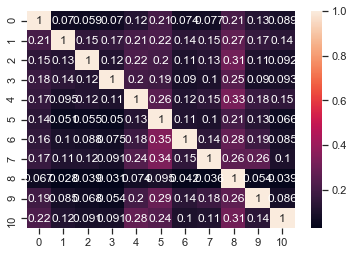

In [96]:
sns.heatmap(coocc_matrix_percentage, annot=True)

In [114]:
master[['current_amount','primary_disease_cat']].groupby('primary_disease_cat').agg(sum).sort_values('current_amount', ascending=False)

,current_amount
primary_disease_cat,
Neoplasms,259168259.0
No disease,70516311.0
Injuries and external causes,61298996.0
Cardiovascular diseases,45106349.0
Infections,24244999.0
Nervous system diseases,21875845.0
Genitourinary diseases,12298939.0
Gastrointestinal diseases,11514649.0
Musculoskeletal diseases,10742674.0


In [115]:
master[['goal_amount','primary_disease_cat']].groupby('primary_disease_cat').agg(sum).sort_values('goal_amount', ascending=False)

,goal_amount
primary_disease_cat,
Neoplasms,715627160.0
No disease,204350730.0
Injuries and external causes,199589969.0
Cardiovascular diseases,149738343.0
Infections,73104380.0
Nervous system diseases,70402282.0
Genitourinary diseases,46819088.0
Gastrointestinal diseases,45268641.0
Respiratory diseases,37426480.0


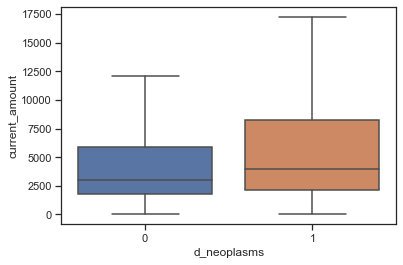

In [146]:
sns.boxplot(x='d_neoplasms',y='current_amount',data=master, showfliers=False)

# Exploring text

### Top words for each disease category

In [44]:
neo = er[er['disease_category'] == 'Neoplasms']
inj = er[er['disease_category'] == 'Injuries and external causes']
cv = er[er['disease_category'] == 'Cardiovascular diseases']
inf = er[er['disease_category'] == 'Infections']
resp = er[er['disease_category'] == 'Respiratory diseases']
gi = er[er['disease_category'] == 'Gastrointestinal diseases']
gu = er[er['disease_category'] == 'Genitourinary diseases']
endo = er[er['disease_category'] == 'Endocrine diseases']
men = er[er['disease_category'] == 'Mental and substance use disorders']
msk = er[er['disease_category'] == 'Musculoskeletal diseases']
neuro = er[er['disease_category'] == 'Nervous system diseases']

In [47]:
neo['chunks'].str.lower().value_counts(normalize=True)[:8]

cancer           0.276967
tumor            0.086890
chemo            0.070523
chemotherapy     0.069728
radiation        0.061885
breast cancer    0.048423
tumors           0.022122
brain tumor      0.013126
Name: chunks, dtype: float64

In [48]:
inj['chunks'].str.lower().value_counts(normalize=True)[:8]

accident        0.146456
injuries        0.145456
injury          0.110075
injured         0.060690
trauma          0.025681
burns           0.025123
damage          0.021703
brain injury    0.018447
Name: chunks, dtype: float64

In [49]:
cv['chunks'].str.lower().value_counts(normalize=True)[:8]

stroke                      0.251053
heart surgery               0.091279
heart attack                0.083956
strokes                     0.038005
heart transplant            0.032644
cardiac arrest              0.024459
aneurysm                    0.022257
congestive heart failure    0.017088
Name: chunks, dtype: float64

In [50]:
inf['chunks'].str.lower().value_counts(normalize=True)[:8]

infection       0.308210
als             0.091117
infections      0.084894
lyme disease    0.066734
infected        0.037336
sepsis          0.032066
sickness        0.031939
lupus           0.028827
Name: chunks, dtype: float64

In [51]:
resp['chunks'].str.lower().value_counts(normalize=True)[:8]

pneumonia          0.293066
lung transplant    0.069479
flu                0.055692
asthma             0.052689
copd               0.040950
bronchitis         0.029621
lung disease       0.027164
sinus infection    0.019383
Name: chunks, dtype: float64

In [52]:
gi['chunks'].str.lower().value_counts(normalize=True)[:8]

liver transplant      0.101395
pancreatitis          0.054998
hernia                0.041835
liver failure         0.041835
ulcerative colitis    0.032712
crohn's disease       0.032712
liver disease         0.031539
ca                    0.029063
Name: chunks, dtype: float64

In [53]:
gu['chunks'].str.lower().value_counts(normalize=True)[:8]

dialysis             0.242138
kidney failure       0.128990
kidney transplant    0.128754
kidney disease       0.062426
endometriosis        0.053204
renal failure        0.040435
infertility          0.028376
kidney stones        0.022464
Name: chunks, dtype: float64

In [54]:
endo['chunks'].str.lower().value_counts(normalize=True)[:8]

diabetes           0.204668
diabetic           0.106414
type 1 diabetes    0.076220
cystic fibrosis    0.070018
cf                 0.021870
malnutrition       0.017137
type 1 diabetic    0.015179
type 2 diabetes    0.014526
Name: chunks, dtype: float64

In [55]:
men['chunks'].str.lower().value_counts(normalize=True)[:8]

anxiety           0.179153
depression        0.154069
autism            0.079487
lyme              0.068339
ptsd              0.063322
mental illness    0.021516
panic attacks     0.020401
panic             0.016276
Name: chunks, dtype: float64

In [56]:
msk['chunks'].str.lower().value_counts(normalize=True)[:8]

autoimmune disease       0.048937
fibromyalgia             0.043423
arthritis                0.041011
scoliosis                0.040207
rheumatoid arthritis     0.026077
crps                     0.024354
autoimmune disorder      0.016427
neurological disorder    0.012981
Name: chunks, dtype: float64

In [57]:
neuro['chunks'].str.lower().value_counts(normalize=True)[:8]

epilepsy          0.064623
sclerosis         0.057185
migraines         0.055615
paralysis         0.029419
hydrocephalus     0.029336
dementia          0.026692
neuropathy        0.026031
cerebral palsy    0.023800
Name: chunks, dtype: float64

### Topic modeling

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [135]:
# Load the regular expression library
import re
# Remove punctuation
master['text_processed'] = master['fund_description'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
master['text_processed'] = master['text_processed'].map(lambda x: x.lower())

In [138]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/sd363/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [139]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [268]:
data = master.text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)


In [269]:
data_words = data_words[:100]

In [270]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [271]:
from pprint import pprint
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

Process ForkPoolWorker-16:
Process ForkPoolWorker-17:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/pool.py", line 105, in worker
    initializer(*initargs)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/pool.py", line 105, in worker
    initializer(*initargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/gensim/models/ldamulticore.py", line 335, in worker_e_step
    chunk_no, chunk, w_state = input_queue.get()
  File "/opt/anaconda3/lib/pyth

KeyboardInterrupt: 

In [ ]:
#to add topics to dataframe: 
#https://stackoverflow.com/questions/46574720/python-gensim-lda-add-the-topic-to-the-document-after-getting-the-topics

### Analyze social media shares missing data

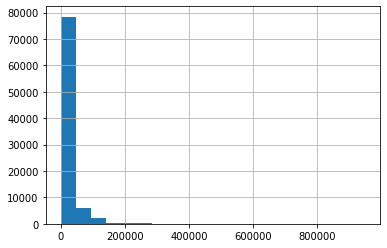

In [201]:
master['goal_amount'].hist(bins=20)

In [218]:
shares.shape

(92962, 4)

In [219]:
master.shape

(86747, 127)

In [220]:
shares = shares.drop_duplicates('url')

In [221]:
shares.shape

(88666, 4)

In [222]:
master = master.merge(shares, on='url', how='inner')

In [223]:
master.shape

(82725, 130)

In [224]:
master.loc[:,'missing_shares'] = master['shares'].isna()

In [225]:
pd.crosstab(master['resp'], master['missing_shares'])

missing_shares,False,True
resp,,
200.0,72377,10211
404.0,0,129
502.0,0,4


In [226]:
pd.crosstab(master['year'], master['missing_shares'])

missing_shares,False,True
year,,
2010,6,0
2011,27,3
2012,101,6
2013,802,68
2014,5767,570
2015,14571,1051
2016,11712,675
2017,9258,324
2018,10021,485


In [185]:
master[master['missing_shares'] == True]['year'].value_counts(normalize=True).sort_index()

2011    0.000397
2012    0.000662
2013    0.007415
2014    0.058395
2015    0.105535
2016    0.063559
2017    0.031780
2018    0.050053
2019    0.400689
2020    0.281515
Name: year, dtype: float64

In [186]:
 master[master['missing_shares'] != True]['year'].value_counts(normalize=True).sort_index()

2010    0.000075
2011    0.000428
2012    0.001378
2013    0.011827
2014    0.082418
2015    0.205215
2016    0.163308
2017    0.127212
2018    0.143174
2019    0.147327
2020    0.117638
Name: year, dtype: float64

# Export data for Matt

In [53]:
list_to_sub = [
    'url',
    'year',
    'census_region',
    'd_cardiovascular_diseases',
    'd_endocrine_diseases',
    'd_gastrointestinal_diseases',
    'd_genitourinary_diseases',
    'd_infections',
    'd_injuries_and_external_causes',
    'd_mental_behavioral_and_substance_use_disorders',
    'd_musculoskeletal_diseases',
    'd_neoplasms',
    'd_nervous_system_diseases',
    'd_respiratory_diseases',
    'has_internet',
    'no_health_insurance',
    'unemployment_rate',
    'percent_poverty',
    'current_amount',
    'current_amount_winsor_1',
    'current_amount_winsor_25',
    'current_amount_winsor_5',
    'goal_amount',
    'goal_amount_winsor_1',
    'goal_amount_winsor_25',
    'goal_amount_winsor_5',
    'donation_count',
    'donation_count_winsor_1',
    'donation_count_winsor_25',
    'donation_count_winsor_5',
    'don_mean',
    'donation_amount_winsor_1',
    'donation_amount_winsor_25',
    'donation_amount_winsor_5'
]

In [54]:
matt = master[list_to_sub]

In [55]:
matt.rename(columns={'don_mean': 'donation_amount'}, inplace=True)

In [57]:
matt.to_csv('../for_matt/cf_data.csv', index=False)

### Check if any urls were left out of algorithm

In [1]:
import json
import pandas as pd

In [2]:
with open('../not_currently_using/spark-jsl-ccsr/input_data/feed_chunk_1.json') as f:
    chunk_1 = json.load(f)
    df_1 = pd.DataFrame(chunk_1)

with open('../not_currently_using/spark-jsl-ccsr/input_data/feed_chunk_2.json') as f:
    chunk_2 = json.load(f)
    df_2 = pd.DataFrame(chunk_2)
    
with open('../not_currently_using/spark-jsl-ccsr/input_data/feed_chunk_3.json') as f:
    chunk_3 = json.load(f)
    df_3 = pd.DataFrame(chunk_3)
    
with open('../not_currently_using/spark-jsl-ccsr/input_data/feed_chunk_4.json') as f:
    chunk_4 = json.load(f)
    df_4 = pd.DataFrame(chunk_4)

In [3]:
er = pd.concat([df_1,df_2,df_3,df_4])

In [30]:
deid = pd.read_csv('../data/disease_categorization/url_deid_map.csv')

In [33]:
deid.head()

,url,url_deid
0,https://www.gofundme.com/f/Amarilindo,0
1,https://www.gofundme.com/f/m6gg66vd,1
2,https://www.gofundme.com/f/2vhyamk,2
3,https://www.gofundme.com/f/support-loving-moth...,3
4,https://www.gofundme.com/f/Aeolis_Est,4


In [34]:
er.columns = ['text','url_deid']

In [35]:
er = er.merge(deid, on='url_deid', how='left')

In [36]:
er.shape

(89493, 3)

In [16]:
master.columns

Index(['index', 'url', 'donation_count', 'donor_reached_max', 'currencycode',
       'current_amount', 'goal_amount', 'fund_name', 'created_at',
       'social_share_last_update', 'city', 'country', 'postal_code', 'is_team',
       'state_raw', 'zip_len', 'zip', 'county_fips_5', 'year', 'month',
       'county_name', 'total_population', 'unemployment_rate', 'median_income',
       'percent_poverty', 'no_health_insurance', 'public_health_insurance',
       'private_health_insurance', 'ed_percent_highschool',
       'ed_percent_bachelors', 'has_internet', 'percent_less_10k',
       'percent_10k_15k', 'percent_15k_25k', 'percent_25k_35k',
       'percent_white', 'percent_under_5', 'percent_5_to_9',
       'percent_10_to_14', 'percent_15_to_19', 'percent_20_to_24',
       'percent_25_to_34', 'percent_35_to_44', 'percent_45_to_54',
       'percent_55_to_59', 'percent_60_to_64', 'percent_65_to_74',
       'percent_75_to_84', 'percent_85_over', 'percent_65_and_over',
       'percent_18_and_ov

In [37]:
er_url = er['url'].unique().tolist()
m_url = master['url'].unique().tolist()

In [45]:
len(set(er_url).difference(set(m_url)))

729

# Old code

In [324]:
disease_cat_melt = disease_pivot_sub.melt(id_vars=['url'])

In [329]:
disease_cat_melt.columns = ['url','cat','present']

In [332]:
a.loc[:,'present_lab'] = ['present' if x == 1 else 'absent' for x in a['present']]

In [336]:
a.replace({'Mental, behavioral, and substance use disorders':'Mental and substance use disorders'}, inplace=True)